# Analysis, Hypothesis, and Predictions

# Step 1 - Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from google.colab import data_table
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score  
plt.rcParams["figure.figsize"] = (20,5)

In [ ]:
# Imported CompanyA.csv
CompanyA = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Collaborative App Dev/DatasetA.csv')
# CompanyB = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Collaborative App Dev/DatasetB.csv')
CompanyC = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Collaborative App Dev/DatasetC.csv')

CompanyA = CompanyA[CompanyA['BookingStatus'] == 'Attending']
# CompanyB = CompanyB[CompanyB['BookingStatus'] == 'Attending']
CompanyC = CompanyC[CompanyC['BookingStatus'] == 'Registered']

Company = pd.concat([CompanyA, CompanyC])
data_table.DataTable(Company)

In [ ]:
# #Encoding categorical variables to be able to find correlation
encode = preprocessing.LabelEncoder()

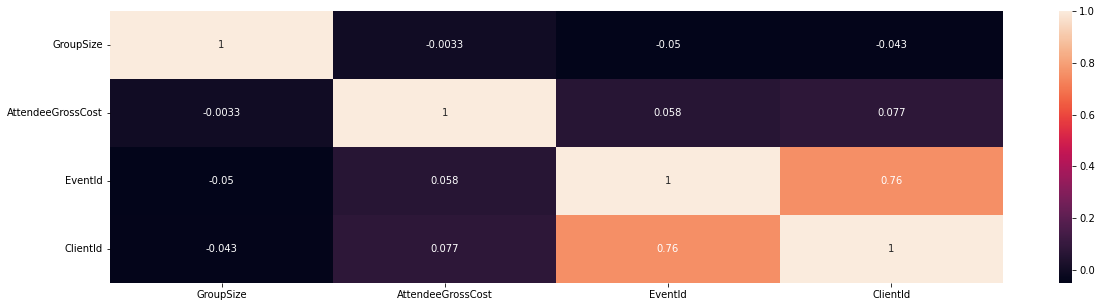

<Figure size 1800x720 with 0 Axes>

In [ ]:
#finding correlation to know which columns to drop
# print(CompanyA.corr())
sns.heatmap(Company.corr(), annot = True)
plt.figure(figsize=(25,10))
plt.show()

In [ ]:
def event_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['eventdayofweek'] = dfs.StartDate.dt.dayofweek
    dfs['eventquarter'] = dfs.StartDate.dt.quarter
    dfs['eventmonth'] = dfs.StartDate.dt.month
    dfs['eventyear'] = dfs.StartDate.dt.year
    dfs['eventdayofyear'] = dfs.StartDate.dt.dayofyear
    dfs['eventdayofmonth'] = dfs.StartDate.dt.day
    dfs['eventweekofyear'] = dfs.StartDate.dt.isocalendar().week
    return dfs

def booking_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['bookingdayofweek'] = dfs.StatusCreatedDate.dt.dayofweek
    dfs['bookingquarter'] = dfs.StatusCreatedDate.dt.quarter
    dfs['bookingmonth'] = dfs.StatusCreatedDate.dt.month
    dfs['bookingyear'] = dfs.StatusCreatedDate.dt.year
    dfs['bookingdayofyear'] = dfs.StatusCreatedDate.dt.dayofyear
    dfs['bookingdayofmonth'] = dfs.StatusCreatedDate.dt.day
    dfs['bookingweekofyear'] = dfs.StatusCreatedDate.dt.isocalendar().week
    return dfs

In [ ]:
#Formating and adding new columns to the dataset
Company['StatusCreatedDate'] = pd.to_datetime(Company['StatusCreatedDate'], infer_datetime_format=True)
Company['StartDate'] = pd.to_datetime(Company['StartDate'], infer_datetime_format=True)
Company['bookingDaysToEvent'] = abs((Company['StartDate'] - Company['StatusCreatedDate']).dt.days)
Company['bookingWeeksToEvent'] = round(Company['bookingDaysToEvent']/7,0)
# Company['bookingweeknumber'] = pd.DatetimeIndex(Company['StatusCreatedDate']).week
# Company['eventWeeknumber'] = pd.DatetimeIndex(Company['StartDate']).week

# To create Season column
_condition_winter = (Company.StartDate.dt.month>=1)&(Company.StartDate.dt.month<=3)
_condtion_spring = (Company.StartDate.dt.month>=4)&(Company.StartDate.dt.month<=6)
_condition_summer = (Company.StartDate.dt.month>=7)&(Company.StartDate.dt.month<=9)
_condition_autumn = (Company.StartDate.dt.month>=10)&(Company.StartDate.dt.month<=12)

Company['EventSeason'] = np.where(_condition_winter,'Winter',np.where(_condtion_spring,'Spring',np.where(_condition_summer,'Summer',np.where(_condition_autumn,'Autumn',np.nan))))

In [ ]:
#Encoding the season
Company['SeasonCode'] = encode.fit_transform(Company['EventSeason'])
Company = booking_features(Company)
Company = event_features(Company)

In [ ]:
Company.head()
# data_table.DataTable(Company)

EventName           StartDate  \
0  Neoliberalism. the Family. and Bourgeois Domes... 2021-10-12 15:00:00   
1                                 Queer Homemaking I 2021-10-22 15:00:00   
2  Neoliberalism. the Family. and Bourgeois Domes... 2021-10-12 15:00:00   
3                                 Queer Homemaking I 2021-10-22 15:00:00   
4  Neoliberalism. the Family. and Bourgeois Domes... 2021-10-12 15:00:00   

       EventType BookingReference AttendeeReference  GroupSize IsLeadAttendee  \
0        Seminar          B953419          A1021430          1           True   
1  Reading Group          B954541          A1022562          1           True   
2        Seminar          B956238          A1024268          1           True   
3  Reading Group          B959604          A1027663          1           True   
4        Seminar          B959608          A1027667          1           True   

   AttendeeGrossCost  EventId BookingStatus  ... bookingdayofyear  \
0                0.0    24077     Attending  ...              123   
1                0.0    24071     Attending  ...              215   
2                0.0    24077     Attending  ...              276   
3                0.0    24071     Attending  ...               75   
4                0.0    24077     Attending  ...               75   

  bookingdayofmonth bookingweekofyear  eventdayofweek  eventquarter  \
0                 3                18               1             4   
1                 3                31               4             4   
2                 3                39               1             4   
3                16                11               4             4   
4                16                11               1             4   

   eventmonth eventyear  eventdayofyear  eventdayofmonth  eventweekofyear  
0          10      2021             285               12               41  
1          10      2021             295               22               42  
2          10      2021             285               12               41  
3          10      2021             295               22               42  
4          10      2021             285               12               41  

[5 rows x 32 columns]

# 2. EDA

In [ ]:
# Plotting graphs
def ploting(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red', marker='*')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    # plt.savefig(title, bbox_inches='tight')

In [ ]:
#Plotting with numbers as markers
import pylab as pl
def ploting2(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    pl.figure(figsize=(20,5), dpi=dpi)
    pl.plot(x, y, marker='*')
    for x, y in zip(x, y):
      pl.text(x, y, str(y), color="red", fontsize=12)
      pl.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    pl.margins(0.1)

# 2.3 EDA Tables

In [ ]:
#Selecting related Columns
Company_df2= Company
Company_df2.head()

EventName           StartDate  \
0  Neoliberalism. the Family. and Bourgeois Domes... 2021-10-12 15:00:00   
1                                 Queer Homemaking I 2021-10-22 15:00:00   
2  Neoliberalism. the Family. and Bourgeois Domes... 2021-10-12 15:00:00   
3                                 Queer Homemaking I 2021-10-22 15:00:00   
4  Neoliberalism. the Family. and Bourgeois Domes... 2021-10-12 15:00:00   

       EventType BookingReference AttendeeReference  GroupSize IsLeadAttendee  \
0        Seminar          B953419          A1021430          1           True   
1  Reading Group          B954541          A1022562          1           True   
2        Seminar          B956238          A1024268          1           True   
3  Reading Group          B959604          A1027663          1           True   
4        Seminar          B959608          A1027667          1           True   

   AttendeeGrossCost  EventId BookingStatus  ... bookingdayofyear  \
0                0.0    24077     Attending  ...              123   
1                0.0    24071     Attending  ...              215   
2                0.0    24077     Attending  ...              276   
3                0.0    24071     Attending  ...               75   
4                0.0    24077     Attending  ...               75   

  bookingdayofmonth bookingweekofyear  eventdayofweek  eventquarter  \
0                 3                18               1             4   
1                 3                31               4             4   
2                 3                39               1             4   
3                16                11               4             4   
4                16                11               1             4   

   eventmonth eventyear  eventdayofyear  eventdayofmonth  eventweekofyear  
0          10      2021             285               12               41  
1          10      2021             295               22               42  
2          10      2021             285               12               41  
3          10      2021             295               22               42  
4          10      2021             285               12               41  

[5 rows x 32 columns]

In [ ]:
# result = Company_df2.groupby('StartDate')['bookingWeeksToEvent'].aggregate(['min','max'])
min_result = Company_df2.groupby(['StartDate', 'EventSeason', 'SeasonCode', 'EventId']).aggregate({'GroupSize':'sum','bookingWeeksToEvent':'min'}).reset_index()
min_result.columns = ['StartDate', 'Season', 'SeasonCode', 'EventId', 'TotalTickets', 'LastbookingWeek']
# print(min_result)

max_result = Company_df2.groupby(['StartDate','EventSeason', 'SeasonCode', 'EventId']).aggregate({'GroupSize':'sum', 'bookingWeeksToEvent':'max'}).reset_index()
max_result.columns = ['StartDate2', 'Season2', 'SeasonCode2', 'EventId2', 'TotalTickets2', 'FirstbookingWeek']
# print(max_result)

result_df = pd.concat([min_result, max_result], axis=1, join="inner")

result_df['TotalWeeksToSell'] = result_df['FirstbookingWeek'] - result_df['LastbookingWeek']
result_df.drop(columns=['StartDate2', 'TotalTickets2', 'Season2', 'SeasonCode2', 'EventId2'], inplace=True)

result_df['EventDate'] = result_df['StartDate'].dt.date
# result_df['SeasonCode'] = encode.fit_transform(result_df['Season'])

# result_df = event_features(result_df)

# result_df.set_index('EventDate', inplace=True)


In [ ]:
result_df = event_features(result_df)
result_df = result_df.astype({'eventdayofweek': 'int', 'eventquarter':'int', 'eventmonth':'int', 'eventyear':'int' ,'eventdayofyear':'int','eventdayofmonth':'int','eventweekofyear':'int'})
print(result_df)

               StartDate  Season  SeasonCode  EventId  TotalTickets  \
0    2017-05-12 00:00:00  Spring           1    15005            64   
1    2017-07-12 00:00:00  Summer           2    15029          1005   
2    2017-08-12 00:00:00  Summer           2    15019           145   
3    2017-11-25 00:00:00  Autumn           0    14912           338   
4    2017-11-25 00:00:00  Autumn           0    14948           324   
...                  ...     ...         ...      ...           ...   
1895 2022-12-07 15:00:00  Autumn           0    26281             7   
1896 2022-12-15 15:00:00  Autumn           0    27225            13   
1897 2023-01-13 10:00:00  Winter           3    27545             1   
1898 2023-01-17 14:30:00  Winter           3    27368             6   
1899 2023-03-01 00:00:00  Winter           3    27560             2   

      LastbookingWeek  FirstbookingWeek  TotalWeeksToSell   EventDate  \
0                 4.0              29.0              25.0  2017-05-12   
1

In [ ]:
sesonCodes = result_df['SeasonCode'].unique()
seasonDecodes = encode.inverse_transform(result_df['SeasonCode'].unique())
seasonMap ={}
i=0
for i in range(0, len(sesonCodes)):
  seasonMap[seasonDecodes[i]] = sesonCodes[i]
  i+1

print(seasonMap)
# seasonMap = map(result_df['SeasonCode'].unique(), encode.inverse_transform(result_df['SeasonCode'].unique()))

{'Spring': 1, 'Summer': 2, 'Autumn': 0, 'Winter': 3}


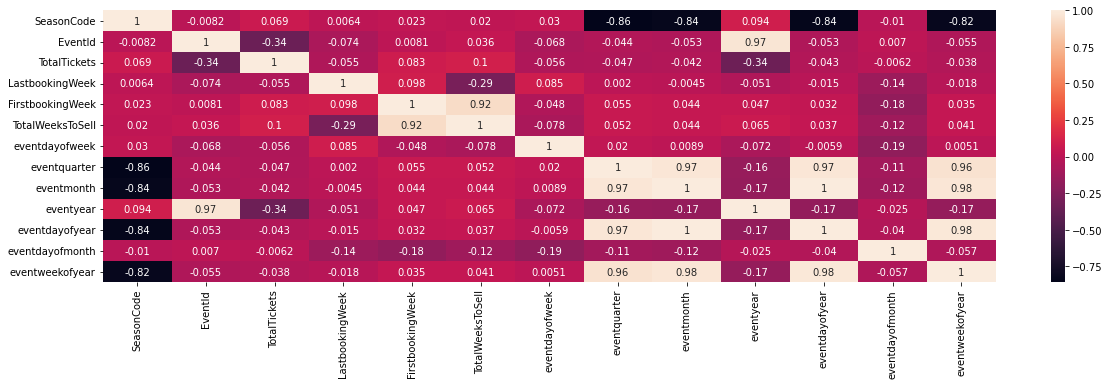

In [ ]:
sns.heatmap(result_df.corr(), annot = True)
plt.show()

# 3. Hypothesis and Correlations

Correlation between first booking week and total weeks to sell

In [ ]:
#Correlation between first booking week and total weeks to sell out
np.corrcoef(result_df['FirstbookingWeek'], result_df['TotalWeeksToSell'])

# -1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables

#Positive correlation

array([[1.        , 0.92485481],
       [0.92485481, 1.        ]])

Correlation between first booking week and total tickets eventually sold

In [ ]:
#Correlation between first booking week and total tickets eventually sold
np.corrcoef(result_df['FirstbookingWeek'], result_df['TotalTickets'])

# -1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables

#No linear correlation

array([[1.        , 0.08315124],
       [0.08315124, 1.        ]])

In [ ]:
from scipy.stats.stats import pearsonr
pearsonr(result_df['FirstbookingWeek'], result_df['TotalTickets'])
#P-Value is greater than 0.05, which means there is not significant correlation
#Meaning, when the ticket sales start doesnt have significant correlation with how many tickets were eventually sold

(0.08315123850654417, 0.0002852075277910272)

Correlation between total weeks to sell and total tickets eventually sold


In [ ]:
#Correlation between total weeks to sell and total tickets eventually sold
np.corrcoef(result_df['TotalWeeksToSell'], result_df['TotalTickets'])

# -1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables

#No linear correlation

array([[1.        , 0.10090211],
       [0.10090211, 1.        ]])

In [ ]:
pearsonr(result_df['TotalWeeksToSell'], result_df['TotalTickets'])
#P-Value is greater than 0.05, which means there is not significant correlation
#Meaning, when the ticket sales start doesnt have significant correlation with how many tickets were eventually sold

(0.10090211075484912, 1.0501714240878774e-05)

Correlation between last booking week and total tickets sold

In [ ]:
#Correlation between first booking week and total tickets eventually sold
np.corrcoef(result_df['LastbookingWeek'], result_df['TotalTickets'])

# -1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables

#No linear correlation

array([[ 1.        , -0.05468993],
       [-0.05468993,  1.        ]])

Correlation between season and total tickets sold

In [ ]:
# np.corrcoef(result_df['SeasonCode'], result_df['TotalTickets'])
np.corrcoef(result_df['SeasonCode'], result_df['TotalTickets'])
#Correlation

array([[1.        , 0.06892807],
       [0.06892807, 1.        ]])

In [ ]:
pearsonr(result_df['SeasonCode'], result_df['TotalTickets'])

(0.06892807026955014, 0.002646190357622802)

OLS to find correlation between first booking week and total tickets eventually sold

In [ ]:
import statsmodels.api as sm
#define predictor and response variables
y = result_df['TotalTickets']
x = result_df[['FirstbookingWeek']]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())

#P-Value is greater than 0.05, which means there is not significant correlation
#Meaning when the ticket sales start doesnt have significant correlation with how many tickets were eventually sold

                            OLS Regression Results                            
Dep. Variable:           TotalTickets   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     13.21
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           0.000285
Time:                        12:26:50   Log-Likelihood:                -14578.
No. Observations:                1900   AIC:                         2.916e+04
Df Residuals:                    1898   BIC:                         2.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               80.8385     28.669  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


OLS to find correlation between Total weeks to sell and total tickets eventually sold

In [ ]:
#Correlation between Total weeks to sell and total tickets eventually sold
import statsmodels.api as sm
#define predictor and response variables
y = result_df['TotalTickets']
x = result_df[['TotalWeeksToSell']]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())


#P-Value is greater than 0.05, which means there is not significant correlation
#Meaning when the total number of weeks to settl the ticket sales doesnt have significant correlation with how many tickets were eventually sold

                            OLS Regression Results                            
Dep. Variable:           TotalTickets   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     19.52
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.05e-05
Time:                        12:26:50   Log-Likelihood:                -14575.
No. Observations:                1900   AIC:                         2.915e+04
Df Residuals:                    1898   BIC:                         2.916e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               70.4526     26.612  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


OLS to check if the combination of first booking week, and Total weeks to sell have effect  on the total tickets eventually sold

In [ ]:
#First booking week and total weeks to sell combined

import statsmodels.api as sm
#define predictor and response variables
y = result_df['TotalTickets']
x = result_df[['FirstbookingWeek', 'TotalWeeksToSell']]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())

#P-Value is greater than 0.05, which means there is not significant correlation
#Meaning when the the combination doesnt have any effect on the total tickets eventually sold

                            OLS Regression Results                            
Dep. Variable:           TotalTickets   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.45
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           3.07e-05
Time:                        12:26:50   Log-Likelihood:                -14574.
No. Observations:                1900   AIC:                         2.915e+04
Df Residuals:                    1897   BIC:                         2.917e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               82.8146     28.628  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ANOVA for season vs total tickets sold

In [ ]:
#Perform one-way ANOVA on categorical variables - Event season and the total tickets sold
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('TotalTickets ~ C(SeasonCode)', data=result_df).fit()
a=sm.stats.anova_lm(model, typ=1)

print('ANOVA Test Results')
print(a)

ANOVA Test Results
                   df        sum_sq        mean_sq         F    PR(>F)
C(SeasonCode)     3.0  2.944347e+06  981449.052737  3.618277  0.012701
Residual       1896.0  5.142855e+08  271247.625088       NaN       NaN


ANOVA for Start date and first week booking vs total tickets sold

In [ ]:
#Perform one-way ANOVA on categorical variables - Event start date and first booking week
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('TotalTickets ~ C(StartDate) + C(FirstbookingWeek)', data=result_df).fit()
a=sm.stats.anova_lm(model, typ=2)

print('ANOVA Test Results')
print(a)

ANOVA Test Results
                           sum_sq      df         F    PR(>F)
C(StartDate)         3.780154e+08  1316.0  1.364110  0.000019
C(FirstbookingWeek)  1.401153e+07    75.0  0.887197  0.735800
Residual             1.090772e+08   518.0       NaN       NaN


In [ ]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
# Finds out the total tickets for each season as a list
CategoryGroupLists=result_df.groupby('Season')['TotalTickets'].apply(list)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value <= 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.012700681344622964


ANOVA for season vs total tickets sold

In [ ]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
# Finds out the total tickets for each season as a list
CategoryGroupLists=result_df.groupby('Season')['TotalTickets'].apply(list)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value <= 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.012700681344622964


For the season against the number of tickets sold, the p-value is less than the significant level (0.05) which means season affects the possible total number of ticket to be sold

ANOVA for season vs total weeks to sell

In [ ]:
from scipy.stats import f_oneway
# Finds out the total tickets for each season as a list
CategoryGroupLists=result_df.groupby('Season')['TotalWeeksToSell'].apply(list)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value <= 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  4.823177971981383e-41


For the season against the number of weeks to sell, the p-value is less than the significant level (0.05) which means season affects the total number of weeks to sell out your tickets

ANOVA for season vs First booking week

In [ ]:
from scipy.stats import f_oneway
# Finds out the total tickets for each season as a list
CategoryGroupLists=result_df.groupby('Season')['FirstbookingWeek'].apply(list)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value <= 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  1.0208002835690602e-47


# Predictions

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set   
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, stratify=None) 

train, test = train_test_split(result_df, shuffle=False, test_size=0.1)

In [ ]:
train.columns

Index(['StartDate', 'Season', 'SeasonCode', 'EventId', 'TotalTickets',
       'LastbookingWeek', 'FirstbookingWeek', 'TotalWeeksToSell', 'EventDate',
       'eventdayofweek', 'eventquarter', 'eventmonth', 'eventyear',
       'eventdayofyear', 'eventdayofmonth', 'eventweekofyear'],
      dtype='object')

# ARIMA Predicion - Total Ticket bookingd

            TotalTickets  LastbookingWeek  FirstbookingWeek
StartDate                                                  
2017-05-14     64.000000              4.0         29.000000
2017-07-16   1005.000000             13.0         26.000000
2017-08-13    145.000000              4.0         30.000000
2017-11-26    262.000000              0.0         25.000000
2017-12-03    821.666667              0.0         37.333333


<AxesSubplot:title={'center':'Average weekly ticket purhcase per event'}, xlabel='Event Dates', ylabel='Weeks to event booking'>

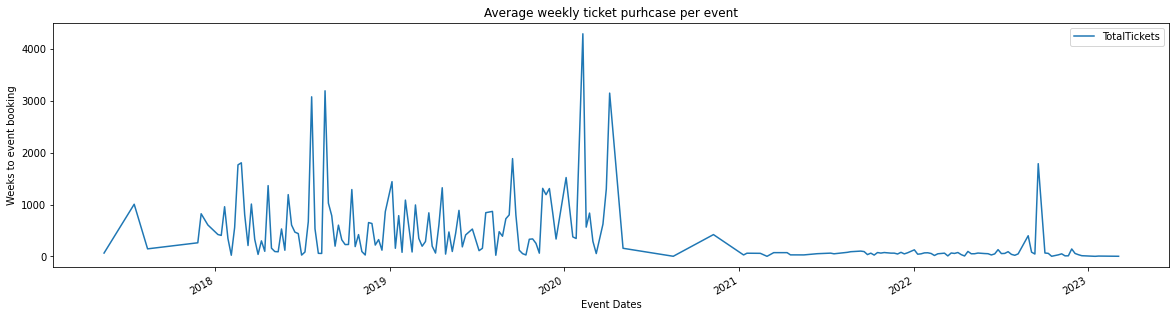

In [ ]:
#ARIMA for total ticket puchased
tickets_arima_df = result_df[['StartDate', 'TotalTickets', 'LastbookingWeek', 'FirstbookingWeek']].set_index('StartDate')

tickets_arima_df = tickets_arima_df.groupby([pd.Grouper(level='StartDate', freq='W')]).mean()#.reset_index()

#dropping rows with Null values
tickets_arima_df.dropna(inplace=True)

print(tickets_arima_df.head())

#Plotting arima_df with average week num
tickets_arima_df['TotalTickets'].plot(legend=True, figsize=(20,5), xlabel = 'Event Dates', ylabel='Weeks to event booking', title='Average weekly ticket purhcase per event')

In [ ]:
#Checking for staionarity before differencing to prevent over differentiation
from statsmodels.tsa.stattools import adfuller

sta_test = adfuller(tickets_arima_df['TotalTickets'], autolag = 'AIC')
print('1. ADF:' , sta_test[0])
print('2. P-Value:' , sta_test[1]) # data set not stationary null-hypothesis is true because it is greater than 0.05
print('3. Num of Lags:' , sta_test[2])
print('4. Num of observations used for ADF Regression and critical values calculation:' , sta_test[3])
print('5. Critival values:')
for key, val in sta_test[4].items():
  print('\t', key, " : ", val)

1. ADF: -2.5755710951162443
2. P-Value: 0.09815206370512225
3. Num of Lags: 6
4. Num of observations used for ADF Regression and critical values calculation: 187
5. Critival values:
	 1%  :  -3.465811691080702
	 5%  :  -2.877123351472649
	 10%  :  -2.5750770662586864


<AxesSubplot:title={'center':'Average demand per week after differencing'}, xlabel='Week', ylabel='Average Demand'>

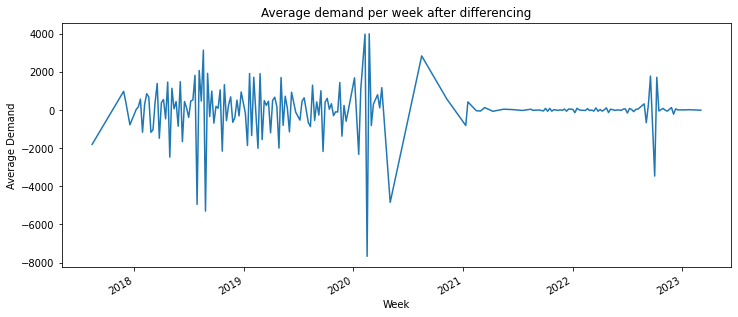

In [ ]:
#differencing to make data stationary
tickets_arima_df['TotalTickets'] = tickets_arima_df.diff().diff().TotalTickets

#dropping rows with Null values
tickets_arima_df.dropna(inplace=True)

#Plotting arima_df with average week num
tickets_arima_df['TotalTickets'].plot(figsize=(20,5), xlabel = 'Week', ylabel='Average Demand', title='Average demand per week after differencing')

In [ ]:
#install this module to get the best order for the ARIMA model
#install this before importing the pmdarima module
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
#Figuring out order for arima model and lookimg for the best arima model to train with (ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec)
from pmdarima import auto_arima
stepwise_fit = auto_arima(tickets_arima_df['TotalTickets'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3300.920, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3210.899, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3298.923, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3172.343, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3134.605, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3112.689, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3101.891, Time=0.12 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3099.892, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3110.691, Time=0.06 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.44 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1543.946
Date:                Thu, 02 Mar 2023   AIC                           3099.892
Time:                        12:27:24   BIC                           3119.437
Sample:                             0   HQIC                          3107.808
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3159      0.038    -34.645      0.000      -1.390      -1.241
ar.L2         -1.3087      0.066    -19.837      0.000      -1.438      -1.179
ar.L3         -1.0810      0.070    -15.496      0.000      -1.218      -0.944
ar.L4         -0.6518      0.079     -8.272      0.000      -0.806      -0.497
ar.L5         -0.2523      0.044     -5.757      0.000      -0.338      -0.166
sigma2      5.656e+05   3.06e+04     18.504      0.000    5.06e+05    6.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):               461.71
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Fitting the arima model and spliting data into train and test
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

train, test = train_test_split(tickets_arima_df, shuffle=False, test_size=0.2)

#training with the best arima model gotten above - ARIMA(0,1,3)(0,0,0)[0]      
tickets_arima = ARIMA(train['TotalTickets'], order=(0,1,1))
tickets_arima  = tickets_arima.fit()
tickets_arima.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           TotalTickets   No. Observations:                  153
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1320.126
Date:                Thu, 02 Mar 2023   AIC                           2644.252
Time:                        12:27:24   BIC                           2650.300
Sample:                             0   HQIC                          2646.709
                                - 153                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.053    -19.026      0.000      -1.103      -0.897
sigma2      1.998e+06   2.63e-08    7.6e+13      0.000       2e+06       2e+06
===================================================================================
Ljung-Box (L1) (Q):                  57.41   Jarque-Bera (JB):               447.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -1.61
Prob(H) (two-sided):                  0.61   Kurtosis:                        10.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.8e+28. Standard errors may be unstable.
"""

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


<AxesSubplot:xlabel='StartDate', ylabel='Average ticket booking'>

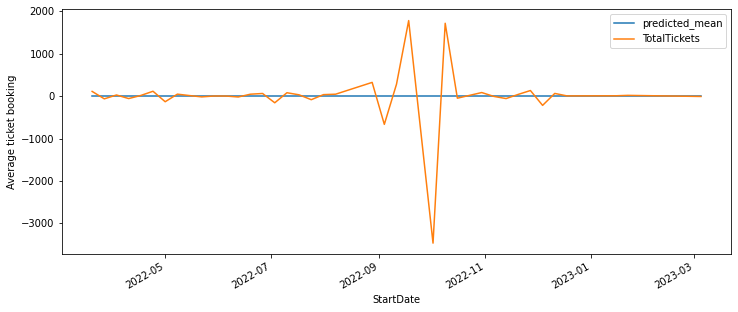

In [ ]:
#Making Predictions with the trained Arima model
start = len(train)
end = len(train)+len(test)-1
pred = tickets_arima.predict(start=start, end=end, typ='levels')
pred.index=tickets_arima_df.index[start:end+1] #reseting index after prediction
# print('Predictions')
# print(pred)
# print('Test data')
# print(test['TotalTickets'])
pred.plot(legend=True, figsize=(20,10), xlabel = 'Week', ylabel='Average ticket booking' )
test['TotalTickets'].plot(legend=True, figsize=(12,5))


In [ ]:
# #Calculating mean squared error for ARIMA
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# print('Mean Average Error: ', mean_absolute_error(test, pred))
# print('Mean Squared Error: ', mean_squared_error(test, pred))
# print('Root Mean Squared Error: ', mean_squared_error(test, pred, squared=False))

# XGBoost Prediction - Total Ticket bookingd

In [ ]:
# print(result_df)
result_df.columns
# result_df.set_index('EventDate')

Index(['StartDate', 'Season', 'SeasonCode', 'EventId', 'TotalTickets',
       'LastbookingWeek', 'FirstbookingWeek', 'TotalWeeksToSell', 'EventDate',
       'eventdayofweek', 'eventquarter', 'eventmonth', 'eventyear',
       'eventdayofyear', 'eventdayofmonth', 'eventweekofyear'],
      dtype='object')

In [ ]:
from xgboost import XGBRegressor

train1, test1 = train_test_split(result_df, shuffle=False, test_size=0.1)
X_train = train1.drop(labels=['TotalTickets', 'StartDate', 'Season', 'EventDate', 'EventId'  ], axis=1).reset_index()
y_train = train1['TotalTickets'].values 

X_test = test1.drop(labels=['TotalTickets', 'StartDate',  'Season', 'EventDate', 'EventId'  ], axis=1).reset_index()
y_test = test1['TotalTickets'].values 

In [ ]:
reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:185.82358	validation_1-mae:62.31404
[1]	validation_0-mae:184.13813	validation_1-mae:61.65017
[2]	validation_0-mae:182.51603	validation_1-mae:61.01014
[3]	validation_0-mae:180.96962	validation_1-mae:60.39080
[4]	validation_0-mae:179.53683	validation_1-mae:59.76108
[5]	validation_0-mae:178.11989	validation_1-mae:59.16122
[6]	validation_0-mae:176.80506	validation_1-mae:58.60569
[7]	validation_0-mae:175.52252	validation_1-mae:58.06888


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-mae:174.31782	validation_1-mae:57.49927
[9]	validation_0-mae:173.12949	validation_1-mae:57.07219
[10]	validation_0-mae:171.97733	validation_1-mae:56.67133
[11]	validation_0-mae:170.90214	validation_1-mae:56.26773
[12]	validation_0-mae:169.88628	validation_1-mae:55.84566
[13]	validation_0-mae:168.84763	validation_1-mae:55.46852
[14]	validation_0-mae:167.91079	validation_1-mae:55.07575
[15]	validation_0-mae:167.02623	validation_1-mae:54.71412
[16]	validation_0-mae:166.13762	validation_1-mae:54.36684
[17]	validation_0-mae:165.19976	validation_1-mae:54.03692
[18]	validation_0-mae:164.31262	validation_1-mae:53.71443
[19]	validation_0-mae:163.50632	validation_1-mae:53.38850
[20]	validation_0-mae:162.70635	validation_1-mae:53.06568
[21]	validation_0-mae:161.88437	validation_1-mae:52.74596
[22]	validation_0-mae:161.14691	validation_1-mae:52.44341
[23]	validation_0-mae:160.39025	validation_1-mae:52.14577
[24]	validation_0-mae:159.69989	validation_1-mae:51.86566
[25]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

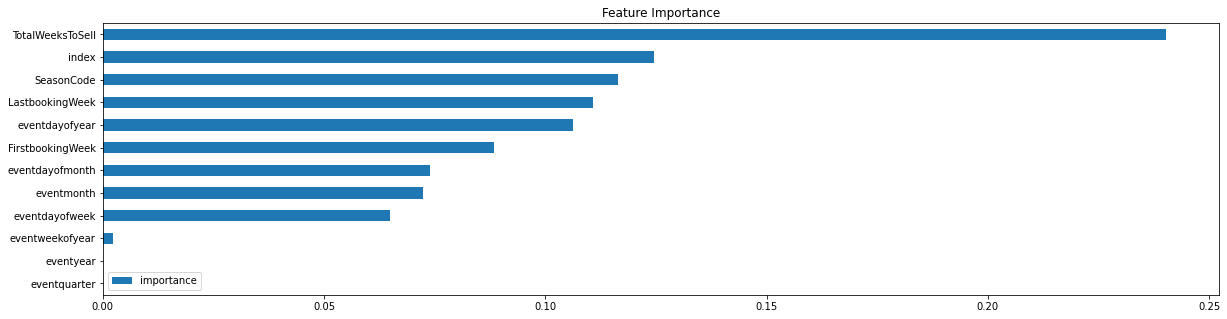

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_, index= reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
predictions = reg.predict(X_test)

In [ ]:
# print(predictions)
test = test1.reset_index().drop('index', axis=1)
test['XGBoostTotalTickets'] = pd.Series(predictions)

In [ ]:
print(test)

              StartDate  Season  SeasonCode  EventId  TotalTickets  \
0   2022-08-02 15:00:00  Summer           2    25377            27   
1   2022-08-02 16:00:00  Summer           2    25360            26   
2   2022-08-02 16:00:00  Summer           2    25739            83   
3   2022-08-02 17:30:00  Summer           2    25202            53   
4   2022-08-02 17:30:00  Summer           2    25570            38   
..                  ...     ...         ...      ...           ...   
185 2022-12-07 15:00:00  Autumn           0    26281             7   
186 2022-12-15 15:00:00  Autumn           0    27225            13   
187 2023-01-13 10:00:00  Winter           3    27545             1   
188 2023-01-17 14:30:00  Winter           3    27368             6   
189 2023-03-01 00:00:00  Winter           3    27560             2   

     LastbookingWeek  FirstbookingWeek  TotalWeeksToSell   EventDate  \
0                4.0              30.0              26.0  2022-08-02   
1              

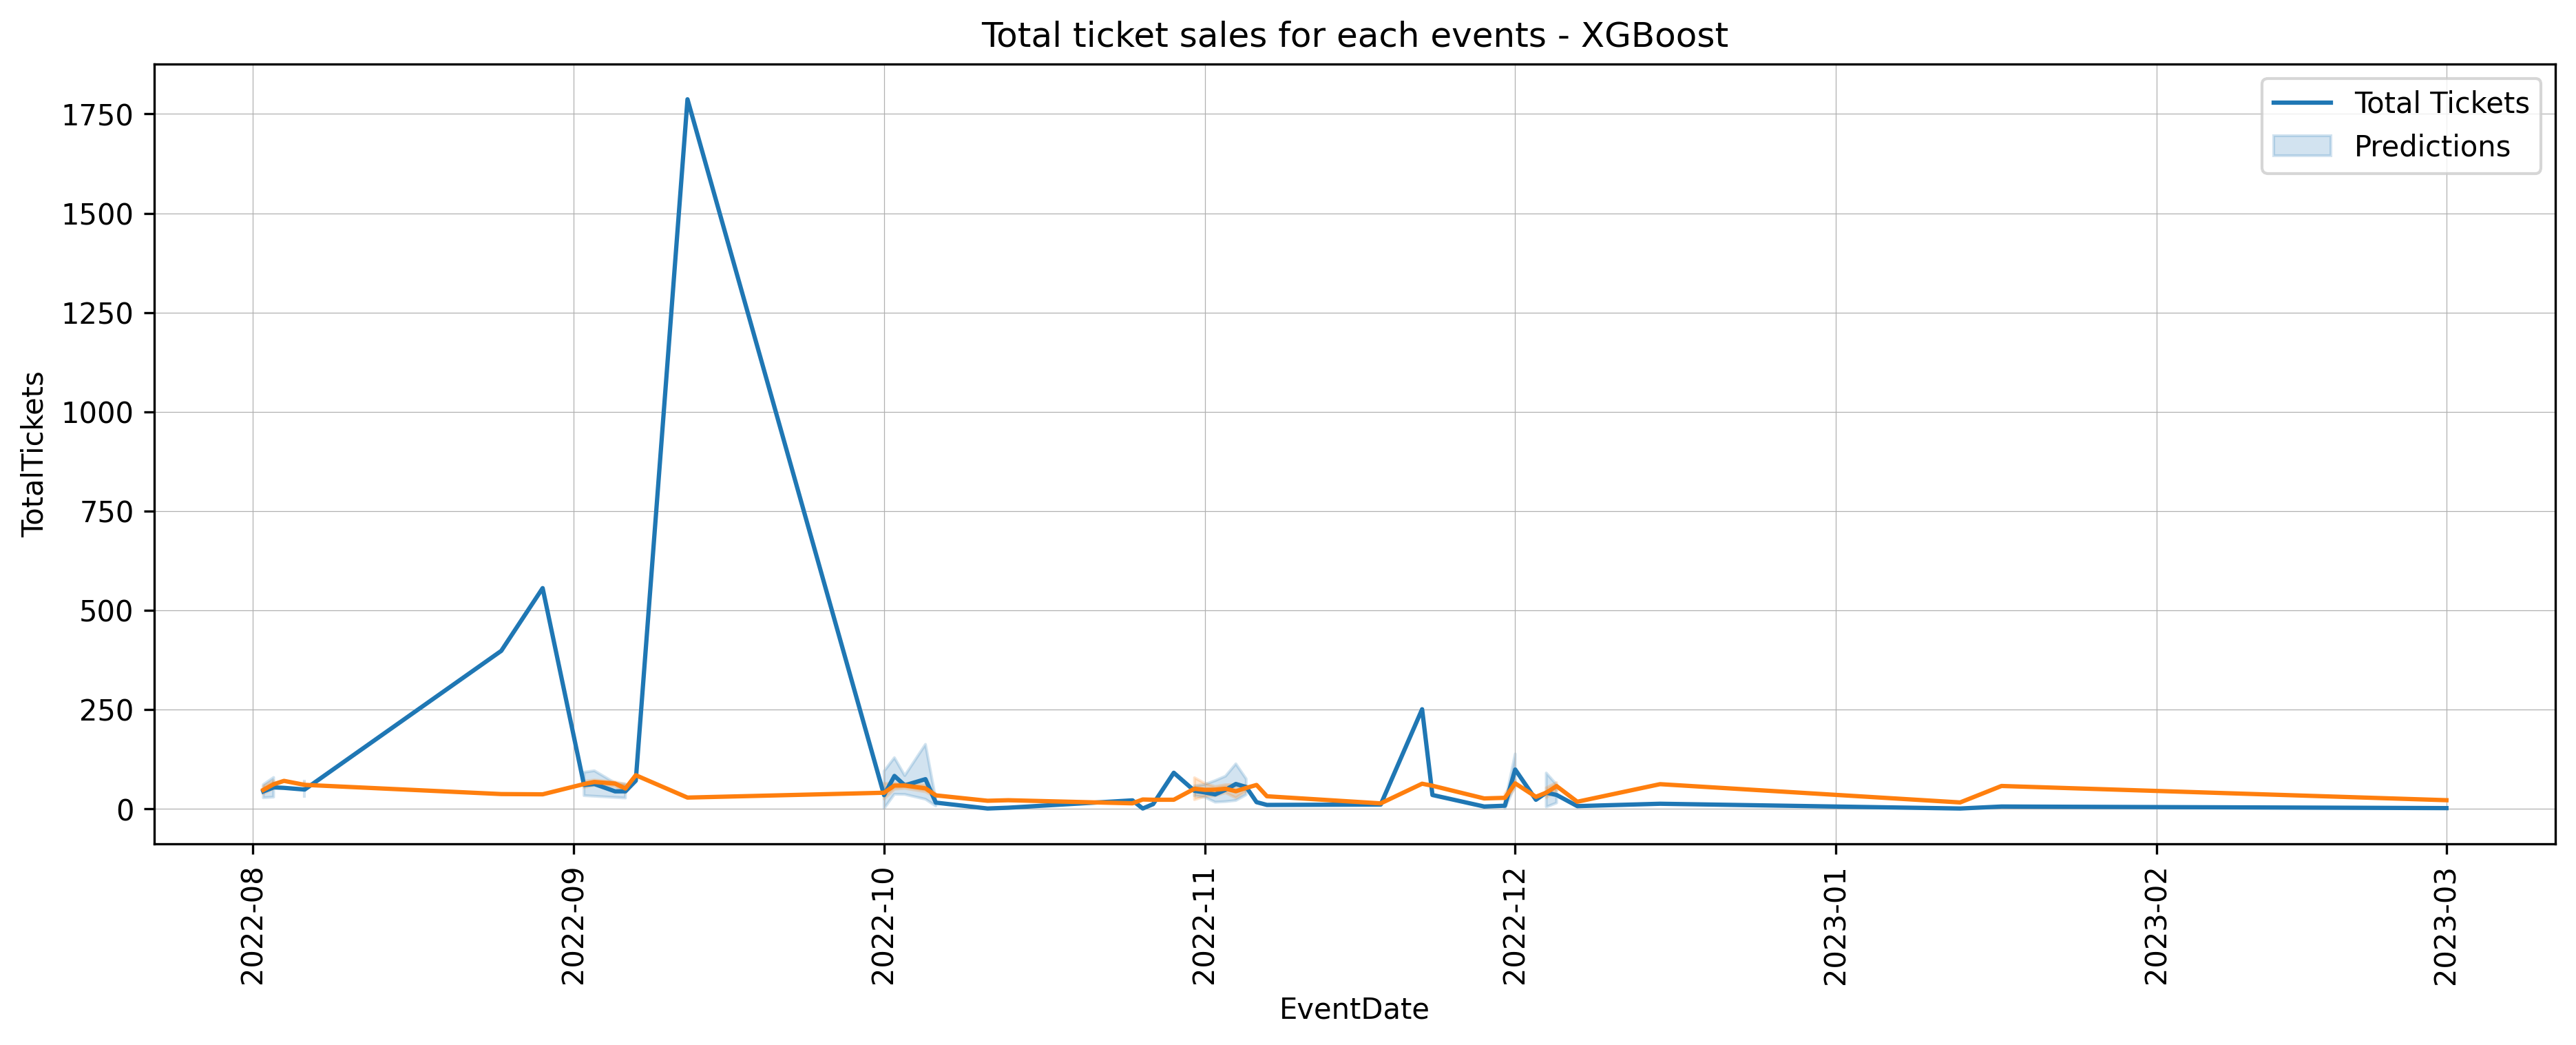

In [ ]:
plt.rcParams.update({'figure.figsize': (15, 5), 'figure.dpi':300})
fig, ax = plt.subplots()

# sns.lineplot(data=test['TotalTickets'])
# sns.lineplot(data=test['predictions'])
sns.lineplot(x=test['EventDate'], y =test['TotalTickets'], data=test)
sns.lineplot(x=test['EventDate'], y =test['XGBoostTotalTickets'], data=test)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Total Tickets","Predictions"])
plt.title('Total ticket sales for each events - XGBoost')
ax.tick_params(axis='x', rotation=90)

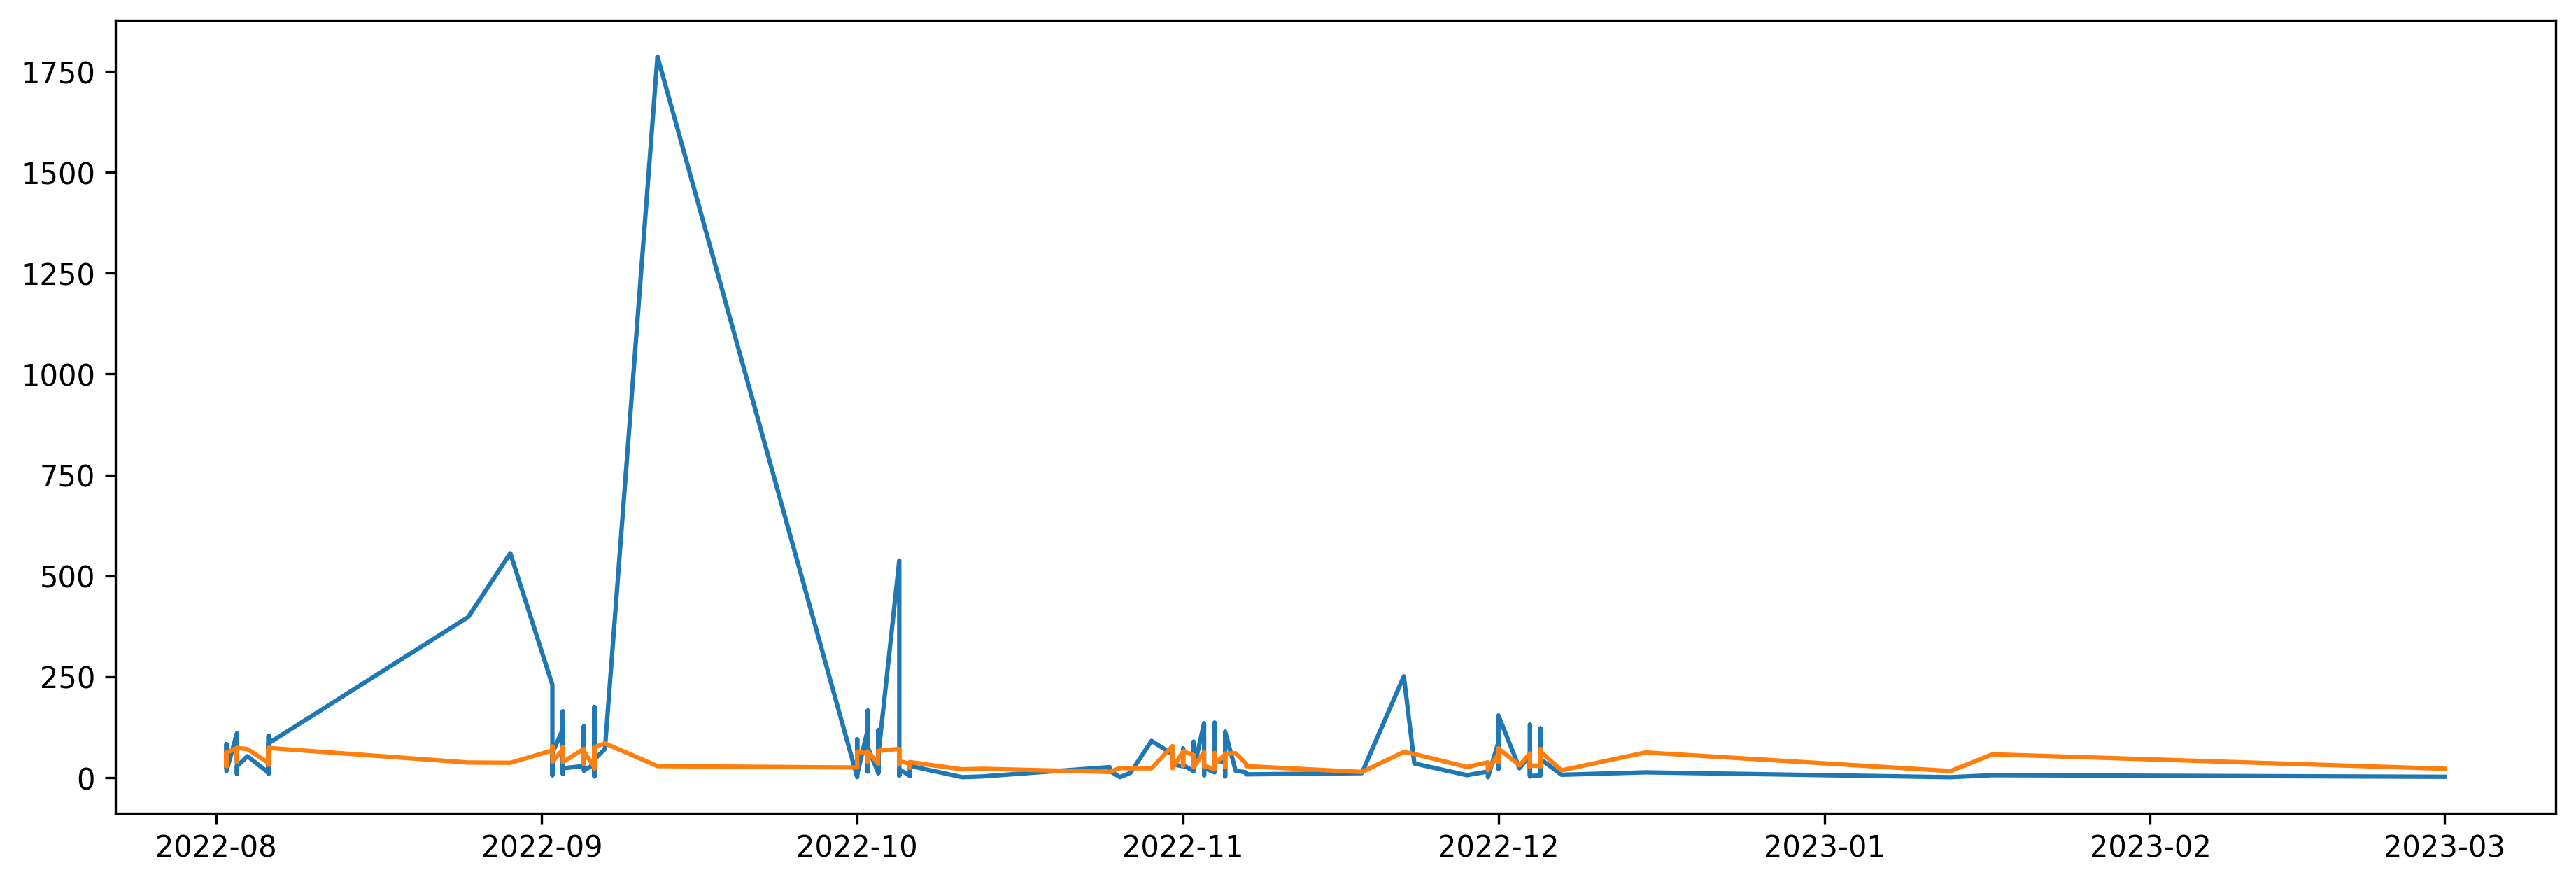

In [ ]:
plt.plot(test['EventDate'], test['TotalTickets'] )
plt.plot(test['EventDate'], test['XGBoostTotalTickets'] )

In [ ]:
print('Mean Average Error: ', mean_absolute_error(test['TotalTickets'], test['XGBoostTotalTickets']))
print('Mean Squared Error: ', mean_squared_error(test['TotalTickets'], test['XGBoostTotalTickets']))
print('Root Mean Squared Error: ', mean_squared_error(test['TotalTickets'], test['XGBoostTotalTickets'], squared=False))

Mean Average Error:  47.71042817266364
Mean Squared Error:  21150.530235361497
Root Mean Squared Error:  145.4322186977889


# XGBoost Prediction - Total Weeks to Sell

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

train2, test2 = train_test_split(result_df, shuffle=False, test_size=0.1)

X_train2 = train2.drop(labels=['TotalWeeksToSell', 'StartDate', 'Season', 'EventDate', 'EventId'  ], axis=1)
y_train2 = train2['TotalWeeksToSell'].values 

X_test2 = test2.drop(labels=['TotalWeeksToSell', 'StartDate', 'Season', 'EventDate', 'EventId'  ], axis=1)
y_test2 = test2['TotalWeeksToSell'].values 

In [ ]:
data_table.DataTable(train2)

In [ ]:
reg2 = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg2.fit(X_train2, 
        y_train2,
        eval_set=[(X_train2, y_train2), (X_test2, y_test2)],
        eval_metric='mae')

[0]	validation_0-mae:28.45827	validation_1-mae:32.96023
[1]	validation_0-mae:28.17610	validation_1-mae:32.64981
[2]	validation_0-mae:27.89673	validation_1-mae:32.34246
[3]	validation_0-mae:27.62011	validation_1-mae:32.03995
[4]	validation_0-mae:27.34625	validation_1-mae:31.73864
[5]	validation_0-mae:27.07482	validation_1-mae:31.43398
[6]	validation_0-mae:26.80638	validation_1-mae:31.13868
[7]	validation_0-mae:26.54040	validation_1-mae:30.84119
[8]	validation_0-mae:26.27747	validation_1-mae:30.55106
[9]	validation_0-mae:26.01666	validation_1-mae:30.25865


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-mae:25.75873	validation_1-mae:29.97479
[11]	validation_0-mae:25.50307	validation_1-mae:29.68818
[12]	validation_0-mae:25.25051	validation_1-mae:29.40794
[13]	validation_0-mae:25.00040	validation_1-mae:29.13099
[14]	validation_0-mae:24.75279	validation_1-mae:28.85607
[15]	validation_0-mae:24.50763	validation_1-mae:28.58635
[16]	validation_0-mae:24.26490	validation_1-mae:28.31622
[17]	validation_0-mae:24.02411	validation_1-mae:28.04546
[18]	validation_0-mae:23.78612	validation_1-mae:27.78372
[19]	validation_0-mae:23.55054	validation_1-mae:27.52290
[20]	validation_0-mae:23.31717	validation_1-mae:27.26880
[21]	validation_0-mae:23.08619	validation_1-mae:27.01472
[22]	validation_0-mae:22.85744	validation_1-mae:26.76306
[23]	validation_0-mae:22.63056	validation_1-mae:26.51039
[24]	validation_0-mae:22.40645	validation_1-mae:26.26272
[25]	validation_0-mae:22.18403	validation_1-mae:26.01493
[26]	validation_0-mae:21.96434	validation_1-mae:25.77215
[27]	validation_0-mae:21.74675	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# fi2 = pd.DataFrame(data=reg.feature_importances_, index= reg2.get_booster().feature_names,
#              columns=['importance'])
# fi2.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

In [ ]:
weekpredictions = reg2.predict(X_test2)
test = test.reset_index().drop('index', axis=1)
test['XGBoostTotalWeeksToSell'] = pd.Series(weekpredictions)


In [ ]:
# print(test)
data_table.DataTable(train)

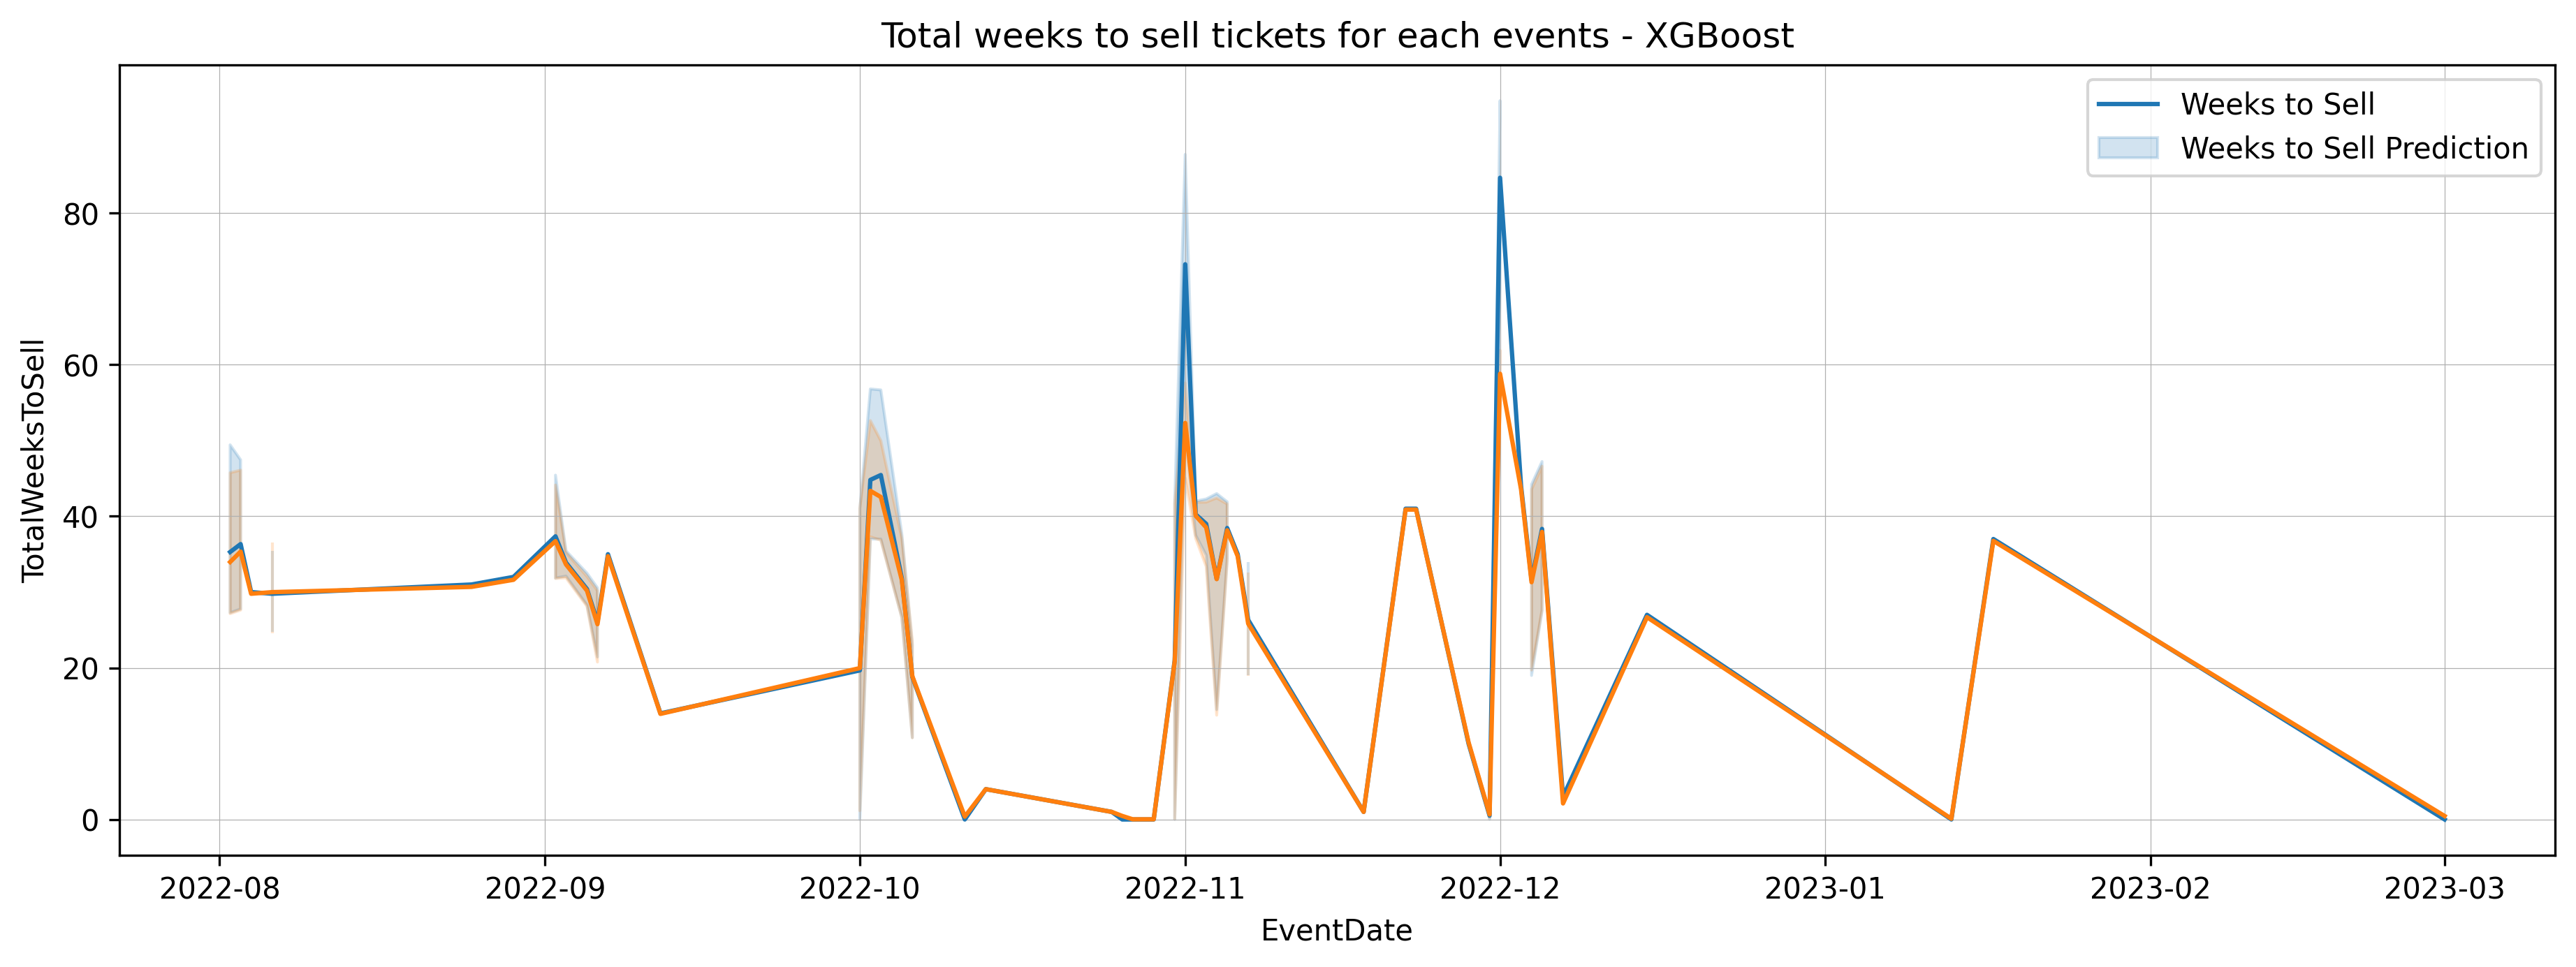

In [ ]:
sns.lineplot(x=test['EventDate'], y =test['TotalWeeksToSell'], data=test)
sns.lineplot(x=test['EventDate'], y =test['XGBoostTotalWeeksToSell'], data=test)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Weeks to Sell","Weeks to Sell Prediction"])
plt.title('Total weeks to sell tickets for each events - XGBoost')
ax.tick_params(axis='x', rotation=90)

In [ ]:
#Neural Network Error
print('Mean Average Error: ', mean_absolute_error(test['TotalWeeksToSell'], test['XGBoostTotalWeeksToSell']))
print('Mean Squared Error: ', mean_squared_error(test['TotalWeeksToSell'], test['XGBoostTotalWeeksToSell']))
print('Root Mean Squared Error: ', mean_squared_error(test['TotalWeeksToSell'], test['XGBoostTotalWeeksToSell'], squared=False))

Mean Average Error:  1.837965686550658
Mean Squared Error:  42.12725266764815
Root Mean Squared Error:  6.490551029585096


# Neural Network Prediction - Total Ticket bookingd

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(units=128, activation='relu'))  
model.add(Dense(units=64, activation='relu')) 
model.add(Dense(units=32, activation='relu')) 
model.add(Dense(units=1))  
model.compile('adam', loss='mse')  

history = model.fit(X_train, y_train , epochs=200) 
predictions2 = model.predict(X_test)  

# print(predictions2)

Epoch 1/200
54/54 [==============================] - 2s 3ms/step - loss: 274259.0312
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 267623.7500
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 270398.9375
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 265702.9688
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 264851.0625
Epoch 6/200
54/54 [==============================] - 0s 4ms/step - loss: 262518.2188
Epoch 7/200
54/54 [==============================] - 0s 5ms/step - loss: 261403.9062
Epoch 8/200
54/54 [==============================] - 0s 5ms/step - loss: 263429.7500
Epoch 9/200
54/54 [==============================] - 0s 4ms/step - loss: 259779.8125
Epoch 10/200
54/54 [==============================] - 0s 4ms/step - loss: 258102.1406
Epoch 11/200
54/54 [==============================] - 0s 4ms/step - loss: 263686.3438
Epoch 12/200
54/54 [==============================] - 0s 5ms/st

In [ ]:
test = test.reset_index().drop('index', axis=1)
test['NNTotalTickets'] = pd.Series(predictions2.flatten())
print(test)

              StartDate  Season  SeasonCode  EventId  TotalTickets  \
0   2022-08-02 15:00:00  Summer           2    25377            27   
1   2022-08-02 16:00:00  Summer           2    25360            26   
2   2022-08-02 16:00:00  Summer           2    25739            83   
3   2022-08-02 17:30:00  Summer           2    25202            53   
4   2022-08-02 17:30:00  Summer           2    25570            38   
..                  ...     ...         ...      ...           ...   
185 2022-12-07 15:00:00  Autumn           0    26281             7   
186 2022-12-15 15:00:00  Autumn           0    27225            13   
187 2023-01-13 10:00:00  Winter           3    27545             1   
188 2023-01-17 14:30:00  Winter           3    27368             6   
189 2023-03-01 00:00:00  Winter           3    27560             2   

     LastbookingWeek  FirstbookingWeek  TotalWeeksToSell   EventDate  \
0                4.0              30.0              26.0  2022-08-02   
1              

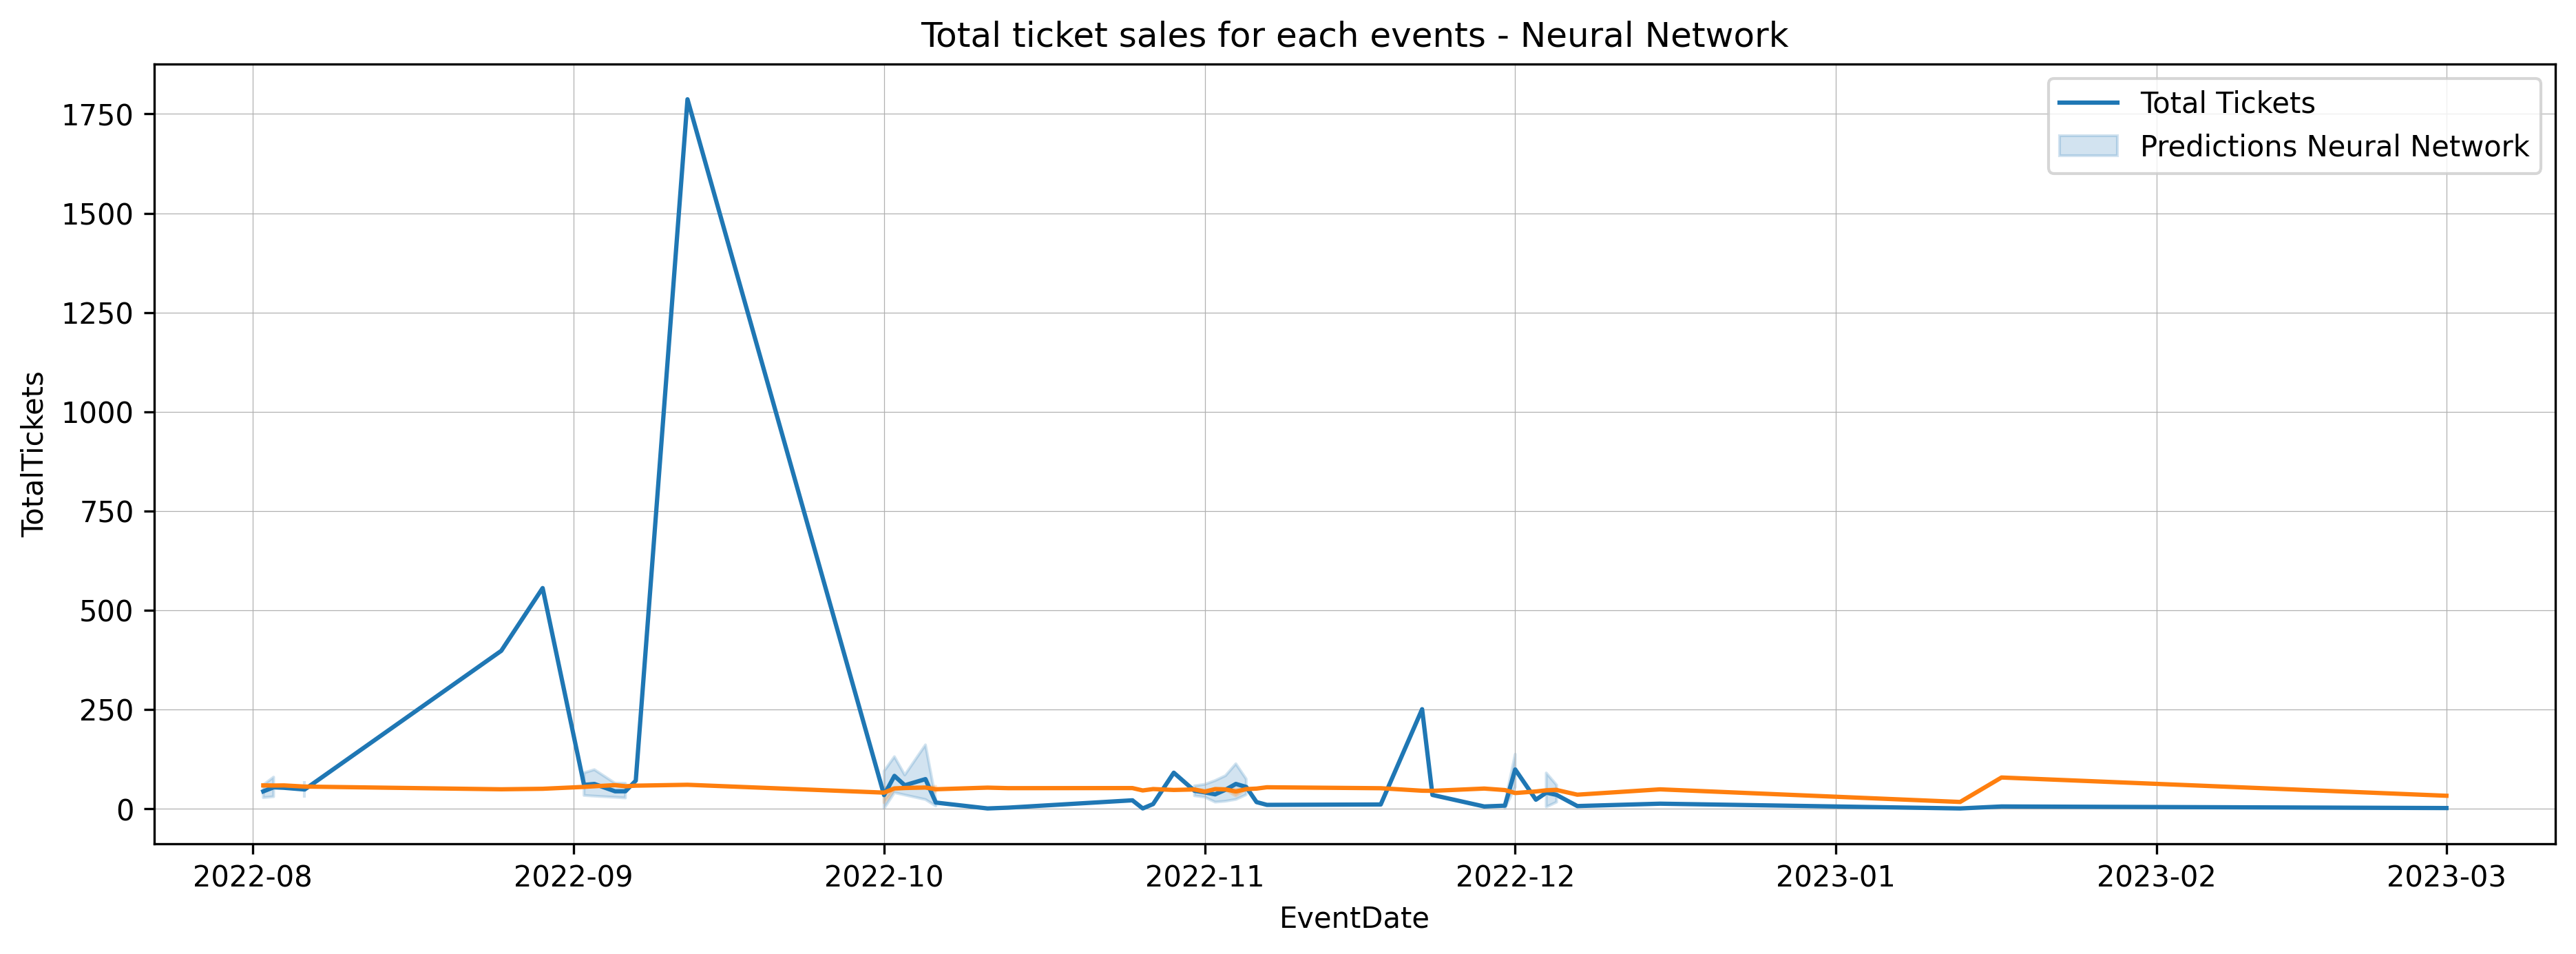

In [ ]:
sns.lineplot(x=test['EventDate'], y =test['TotalTickets'], data=test)
sns.lineplot(x=test['EventDate'], y =test['NNTotalTickets'], data=test)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Total Tickets","Predictions Neural Network"])
plt.title('Total ticket sales for each events - Neural Network')
ax.tick_params(axis='x', rotation=90)

In [ ]:
#Neural Network Error
print('Mean Average Error: ', mean_absolute_error(test['TotalTickets'], test['NNTotalTickets']))
print('Mean Squared Error: ', mean_squared_error(test['TotalTickets'], test['NNTotalTickets']))
print('Root Mean Squared Error: ', mean_squared_error(test['TotalTickets'], test['NNTotalTickets'], squared=False))

Mean Average Error:  51.11717083579615
Mean Squared Error:  20902.673348526114
Root Mean Squared Error:  144.5775686215746


# Neural Network Prediction - Total weeks to sell ticket

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential() 
model2.add(Dense(units=128, activation='relu'))  
model2.add(Dense(units=64, activation='relu')) 
model2.add(Dense(units=32, activation='relu')) 
model2.add(Dense(units=1))  
model2.compile('adam', loss='mse')  

history2 = model2.fit(X_train2, y_train2 , epochs=200) 
NNweekpredictions = model2.predict(X_test2)  

# print(NNweekpredictions)

Epoch 1/200
54/54 [==============================] - 1s 3ms/step - loss: 2894.5076
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 165.8693
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 147.7448
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 140.7158
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 129.1955
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 122.1143
Epoch 7/200
54/54 [==============================] - 0s 3ms/step - loss: 110.6419
Epoch 8/200
54/54 [==============================] - 0s 3ms/step - loss: 98.7327
Epoch 9/200
54/54 [==============================] - 0s 3ms/step - loss: 88.5899
Epoch 10/200
54/54 [==============================] - 0s 3ms/step - loss: 68.2676
Epoch 11/200
54/54 [==============================] - 0s 3ms/step - loss: 50.3343
Epoch 12/200
54/54 [==============================] - 0s 3ms/step - loss: 37.6287
Epoch 13/200
54/5

In [ ]:
test = test.reset_index().drop('index', axis=1)
test['NNTotalWeeksToSell'] = pd.Series(NNweekpredictions.flatten())
data_table.DataTable(test)

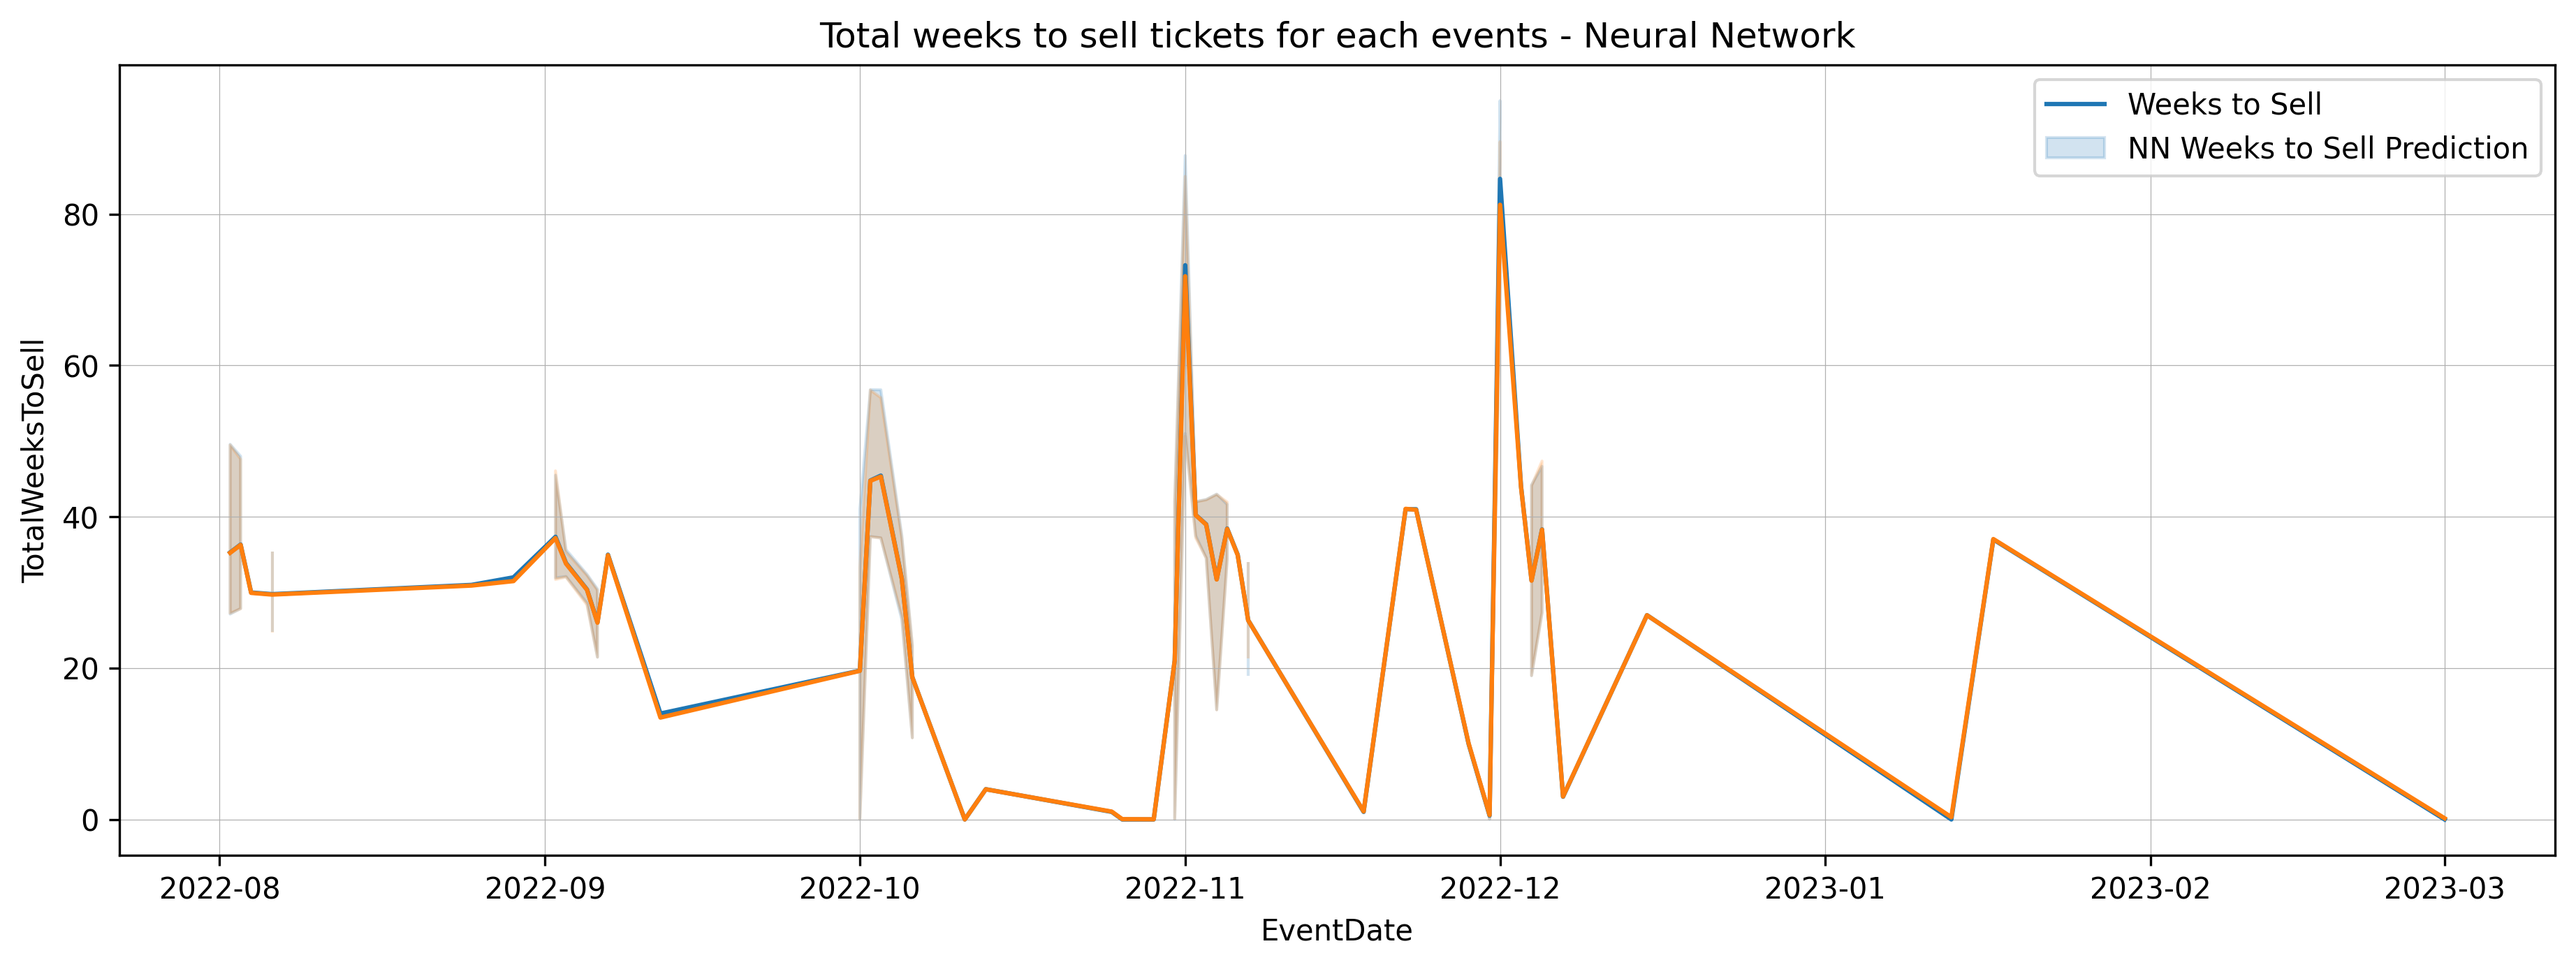

In [ ]:
sns.lineplot(x=test['EventDate'], y =test['TotalWeeksToSell'], data=test)
sns.lineplot(x=test['EventDate'], y =test['NNTotalWeeksToSell'], data=test)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Weeks to Sell","NN Weeks to Sell Prediction"])
plt.title('Total weeks to sell tickets for each events - Neural Network')
ax.tick_params(axis='x', rotation=90)

In [ ]:
data_table.DataTable(test)

# Weekly booking Predictions

In [ ]:
# weeklyPred = Company_df2.set_index('StatusCreatedDate')
# weeklyPred = weeklyPred.resample('w').sum()

# weeklyPred = weeklyPred.groupby('bookingWeeksToEvent').mean()
weeklyPred = Company_df2[['StatusCreatedDate', 'SeasonCode', 'bookingWeeksToEvent', 'GroupSize']]
weeklyPred = booking_features(weeklyPred)
weeklyPred = Company_df2.groupby(['SeasonCode', 'bookingWeeksToEvent', 'bookingquarter', 'bookingweekofyear', 'bookingmonth', 'bookingyear']).aggregate({'GroupSize':'sum'}).reset_index()
# weeklyPred.set_index('StatusCreatedDate')
# weeklyPred = weeklyPred.groupby('SeasonCode').mean()
data_table.DataTable(weeklyPred)

Output hidden; open in https://colab.research.google.com to view.

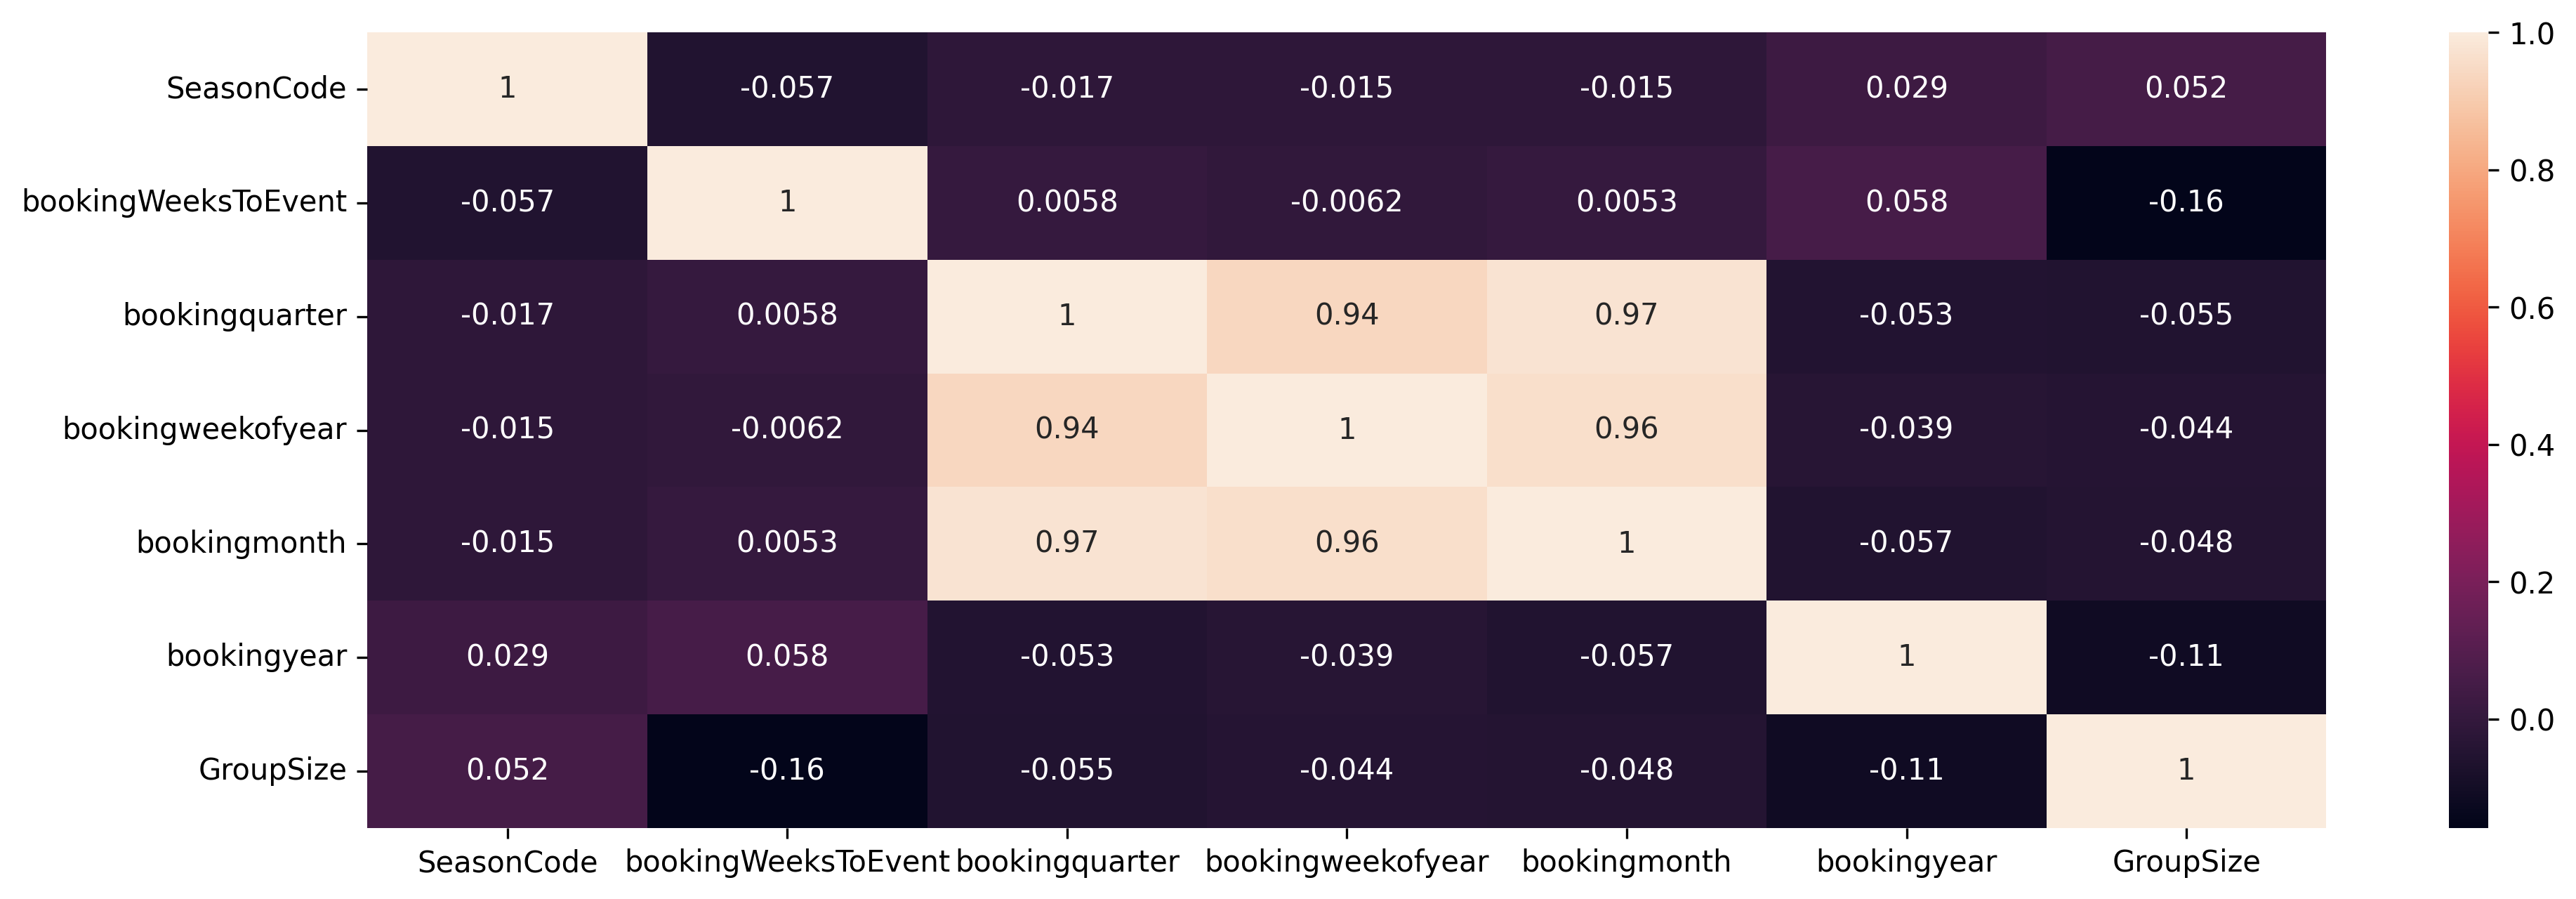

In [ ]:
sns.heatmap(weeklyPred.corr(), annot = True)
plt.show()

In [ ]:
train3, test3 = train_test_split(weeklyPred, shuffle=False, test_size=0.1)

X_train3 = train3.drop(labels=['GroupSize' ], axis=1)
y_train3 = train3['GroupSize'].values 

X_test3 = test3.drop(labels=['GroupSize'], axis=1)
y_test3 = test3['GroupSize'].values 

XGBoost for weekly booking

In [ ]:
reg3 = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg3.fit(X_train3, 
        y_train3,
        eval_set=[(X_train3, y_train3), (X_test3, y_test3)],
        eval_metric='mae')

[0]	validation_0-mae:69.95534	validation_1-mae:47.41129
[1]	validation_0-mae:69.36243	validation_1-mae:47.08119
[2]	validation_0-mae:68.80669	validation_1-mae:46.84123
[3]	validation_0-mae:68.29758	validation_1-mae:46.62980
[4]	validation_0-mae:67.81068	validation_1-mae:46.46996
[5]	validation_0-mae:67.35790	validation_1-mae:46.32864
[6]	validation_0-mae:66.91997	validation_1-mae:46.22197
[7]	validation_0-mae:66.50325	validation_1-mae:46.12253
[8]	validation_0-mae:66.11223	validation_1-mae:46.03627
[9]	validation_0-mae:65.73518	validation_1-mae:45.95090
[10]	validation_0-mae:65.37644	validation_1-mae:45.88363
[11]	validation_0-mae:65.03576	validation_1-mae:45.84838
[12]	validation_0-mae:64.70942	validation_1-mae:45.84429
[13]	validation_0-mae:64.39754	validation_1-mae:45.85442
[14]	validation_0-mae:64.10297	validation_1-mae:45.88303
[15]	validation_0-mae:63.81688	validation_1-mae:45.92174
[16]	validation_0-mae:63.54030	validation_1-mae:45.96090
[17]	validation_0-mae:63.27582	validation

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-mae:61.49743	validation_1-mae:46.50581
[26]	validation_0-mae:61.30615	validation_1-mae:46.57331
[27]	validation_0-mae:61.13197	validation_1-mae:46.63984
[28]	validation_0-mae:60.95710	validation_1-mae:46.71859
[29]	validation_0-mae:60.79572	validation_1-mae:46.79050
[30]	validation_0-mae:60.64189	validation_1-mae:46.86444
[31]	validation_0-mae:60.48410	validation_1-mae:46.94211
[32]	validation_0-mae:60.34208	validation_1-mae:47.01972
[33]	validation_0-mae:60.20623	validation_1-mae:47.09823
[34]	validation_0-mae:60.06061	validation_1-mae:47.18839
[35]	validation_0-mae:59.93489	validation_1-mae:47.27783
[36]	validation_0-mae:59.81275	validation_1-mae:47.37021
[37]	validation_0-mae:59.69363	validation_1-mae:47.45458
[38]	validation_0-mae:59.56716	validation_1-mae:47.54209
[39]	validation_0-mae:59.45743	validation_1-mae:47.63444
[40]	validation_0-mae:59.35177	validation_1-mae:47.72274
[41]	validation_0-mae:59.23706	validation_1-mae:47.81571
[42]	validation_0-mae:59.13839	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
weeklybookingpredictions = reg3.predict(X_test3)
test3 = test3.reset_index().drop('index', axis=1)
test3['XGBoostWeeklyGroupSize'] = pd.Series(weeklybookingpredictions)

data_table.DataTable(test3)

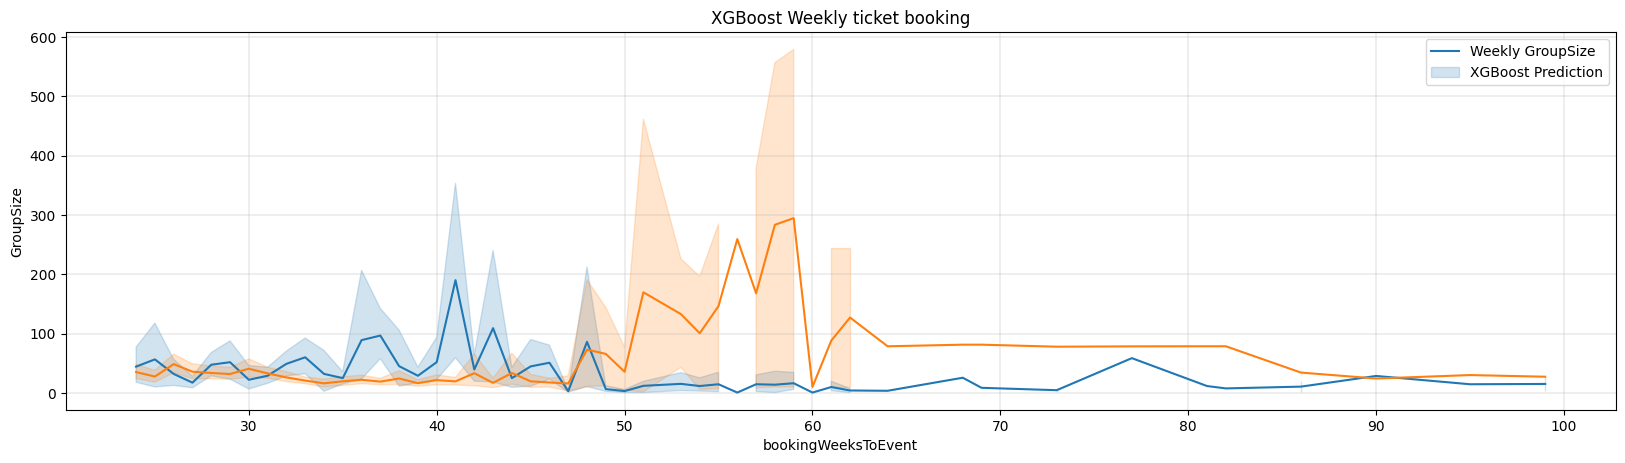

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
sns.lineplot(x=test3['bookingWeeksToEvent'], y =test3['GroupSize'], data=test)
sns.lineplot(x=test3['bookingWeeksToEvent'], y =test3['XGBoostWeeklyGroupSize'], data=test3)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Weekly GroupSize","XGBoost Prediction"])
plt.title('XGBoost Weekly ticket booking')
ax.tick_params(axis='x', rotation=90)

Nueral Network for weekly booking

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model3 = Sequential() 
model3.add(Dense(units=128, activation='relu'))  
model3.add(Dense(units=64, activation='relu')) 
model3.add(Dense(units=32, activation='relu')) 
model3.add(Dense(units=1))  
model3.compile('adam', loss='mse')  

history3 = model3.fit(X_train3, y_train3 , epochs=200) 
NNweeklybookingpredictions = model3.predict(X_test3)  

# print(NNweeklybookingpredictions)

Epoch 1/200
137/137 [==============================] - 2s 3ms/step - loss: 39977.4141
Epoch 2/200
137/137 [==============================] - 1s 4ms/step - loss: 40191.3867
Epoch 3/200
137/137 [==============================] - 1s 4ms/step - loss: 39369.1836
Epoch 4/200
137/137 [==============================] - 1s 4ms/step - loss: 39521.2148
Epoch 5/200
137/137 [==============================] - 1s 4ms/step - loss: 39191.9258
Epoch 6/200
137/137 [==============================] - 1s 4ms/step - loss: 39015.5781
Epoch 7/200
137/137 [==============================] - 1s 4ms/step - loss: 38844.9023
Epoch 8/200
137/137 [==============================] - 1s 4ms/step - loss: 38731.8281
Epoch 9/200
137/137 [==============================] - 1s 4ms/step - loss: 38431.1875
Epoch 10/200
137/137 [==============================] - 1s 4ms/step - loss: 38945.2930
Epoch 11/200
137/137 [==============================] - 0s 3ms/step - loss: 38448.9062
Epoch 12/200
137/137 [==============================

In [ ]:
test3 = test3.reset_index().drop('index', axis=1)
test3['NNWeeklyGroupSize'] = pd.Series(NNweeklybookingpredictions.flatten())
data_table.DataTable(test3)

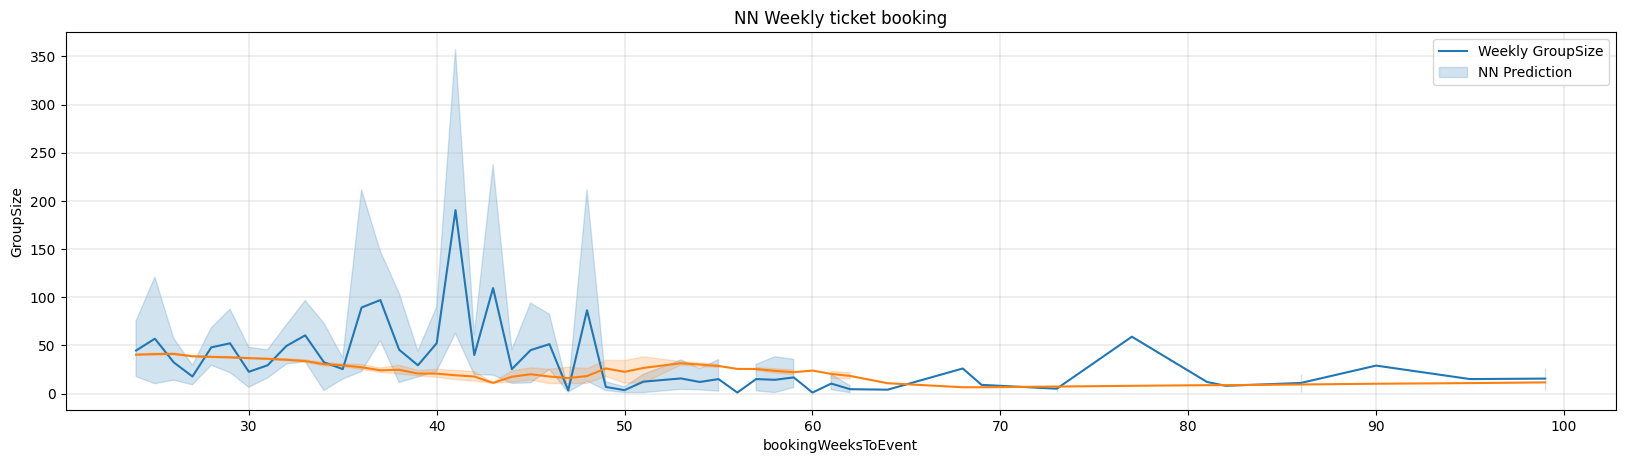

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
sns.lineplot(x=test3['bookingWeeksToEvent'], y =test3['GroupSize'], data=test)
sns.lineplot(x=test3['bookingWeeksToEvent'], y =test3['NNWeeklyGroupSize'], data=test3)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Weekly GroupSize","NN Prediction"])
plt.title('NN Weekly ticket booking')
ax.tick_params(axis='x', rotation=90)

In [ ]:
data_table.DataTable(test3)

# Random Forest Regressor

Total Ticket bookingd

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

train4, test4 = train_test_split(result_df, shuffle=False, test_size=0.1)

X_train4 = train4.drop(labels=['TotalTickets', 'StartDate', 'Season', 'EventDate', 'EventId'  ], axis=1).reset_index()
y_train4 = train4['TotalTickets'].values 

X_test4 = test4.drop(labels=['TotalTickets', 'StartDate',  'Season', 'EventDate', 'EventId'  ], axis=1).reset_index()
y_test4 = test4['TotalTickets'].values 

regressor = RandomForestRegressor(n_estimators=20).fit(X_train4, y_train4)  
predictions4 = regressor.predict(X_test4)

# print(predictions4)

In [ ]:
test4 = test4.reset_index().drop('index', axis=1)
test4['RFRTotalBookings'] = pd.Series(predictions4)
data_table.DataTable(test4)

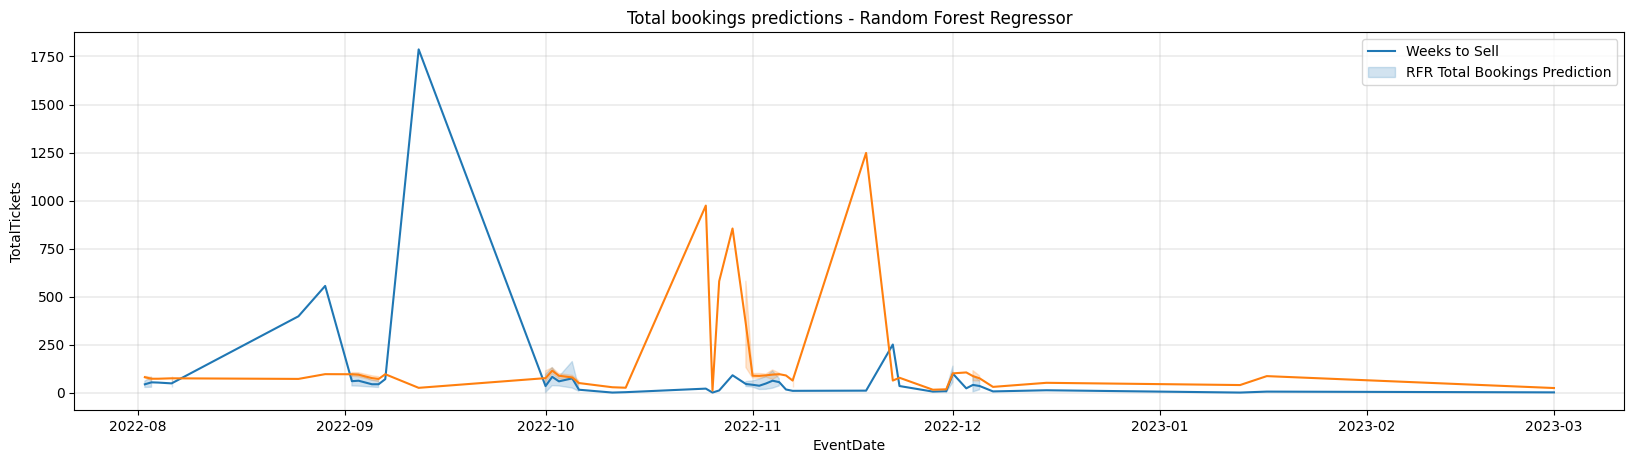

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
sns.lineplot(x=test4['EventDate'], y =test4['TotalTickets'], data=test)
sns.lineplot(x=test4['EventDate'], y =test4['RFRTotalBookings'], data=test)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Weeks to Sell","RFR Total Bookings Prediction"])
plt.title('Total bookings predictions - Random Forest Regressor')
ax.tick_params(axis='x', rotation=90)

Total booking weeks

In [ ]:
#Using train and test 2 from above
regressor = RandomForestRegressor(n_estimators=20).fit(X_train2, y_train2)  
predictions5 = regressor.predict(X_test2)

In [ ]:
test4 = test4.reset_index().drop('index', axis=1)
test4['RFRBookingWeeks'] = pd.Series(predictions5)
data_table.DataTable(test4)

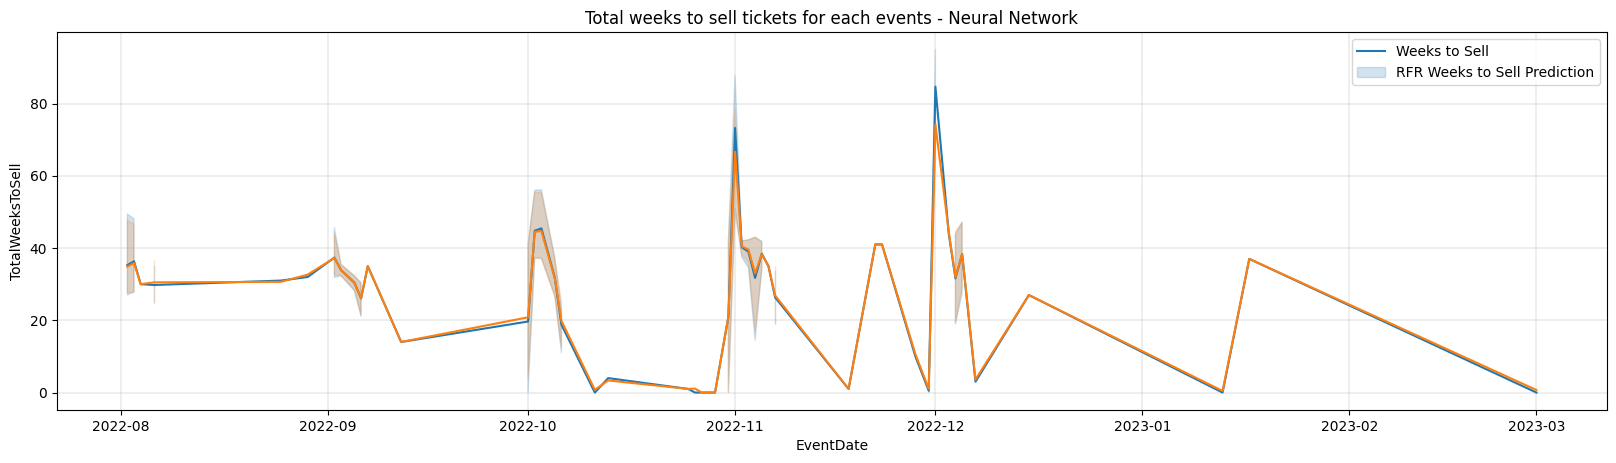

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
sns.lineplot(x=test4['EventDate'], y =test4['TotalWeeksToSell'], data=test)
sns.lineplot(x=test4['EventDate'], y =test4['RFRBookingWeeks'], data=test)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Weeks to Sell","RFR Weeks to Sell Prediction"])
plt.title('Total weeks to sell tickets for each events - Neural Network')
ax.tick_params(axis='x', rotation=90)

Weekly Sales

In [ ]:
#Using train and test 3 from above
regressor = RandomForestRegressor(n_estimators=20).fit(X_train3, y_train3)  
predictions6 = regressor.predict(X_test3)

In [ ]:
test3 = test3.reset_index().drop('index', axis=1)
test3['RFRWeeklybookings'] = pd.Series(predictions6)
data_table.DataTable(test3)

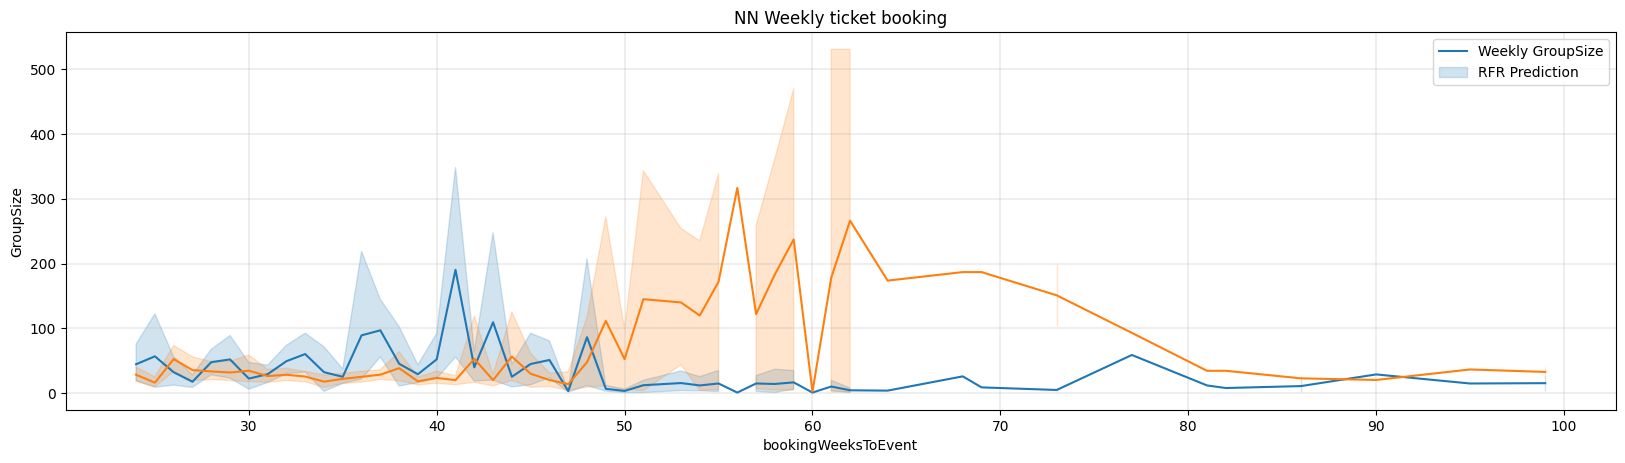

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
sns.lineplot(x=test3['bookingWeeksToEvent'], y =test3['GroupSize'], data=test)
sns.lineplot(x=test3['bookingWeeksToEvent'], y =test3['RFRWeeklybookings'], data=test3)

plt.grid(linestyle='-', linewidth=0.3)
plt.legend(labels=["Weekly GroupSize","RFR Prediction"])
plt.title('NN Weekly ticket booking')
ax.tick_params(axis='x', rotation=90)